In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at
from scipy.stats import norm

# 1. Read in and look at gps data - plot all data

In [3]:
### Read in first data file 

In [4]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/GPS_files/CERN_OPMT'

In [5]:
gpsfile = pd.read_csv(save_dir+str(1780)+'.clk')

In [6]:
gpsfile['diff_CLK(ns)']     ## look at dataset

0      -82.190
1      -82.233
2      -82.247
3      -82.247
4      -82.256
         ...  
2875   -78.554
2876   -78.553
2877   -78.552
2878   -78.553
2879   -78.542
Name: diff_CLK(ns), Length: 2880, dtype: float64

In [7]:
## Convert both columns of interest into units of seconds

unit_mjd = gpsfile['Epoch_mjd']*84600              # from days
unit_clock = gpsfile['diff_CLK(ns)']*10**(-9)      # from nano seconds

In [8]:
## Plot of the time in days vs difference between clocks for first data set (data taken every hour over period of 1 day) \
## slope of this graph is the fractional frequency. \


## fractional frequency == [expected f - actual f] /expected f
## def: change in the phase error of a clock over a period of time

In [9]:
plt.figure(figsize=(15,10))

plt.scatter(unit_mjd,unit_clock,alpha=0.2)        

m,b0 = np.polyfit(unit_mjd,unit_clock, 1)

print(m,b0)           ### m = fractional frequency

plt.xlabel('MJD (seconds)',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.plot(np.array(unit_mjd), m*np.array(unit_mjd) + b0,'r')
plt.title('Plot of dataset 1 - mjd vs clock offset (slope = ff)',fontsize=20)

4.259047846461539e-14 -0.0002167109999087137


Text(0.5, 1.0, 'Plot of dataset 1 - mjd vs clock offset (slope = ff)')

In [10]:
 ## Calculate offset from gravitational redshift using metrology lab height
    
height = 442.420 

(9.81/(299792458)**2)*height

4.8290572368105634e-14

In [11]:
### Read in all files using loop
### f"{i:04}",  f for string,  i for file number , 04 to ensure all file numbers have 4 digits
### try and except used to skip missing indexes (where data point is missing due to broken clock etc)

In [12]:
fileindex = np.arange(10,1780,10)

In [13]:
data_list = []                    

for i in fileindex :
    try: 
        file = pd.read_csv(save_dir+f"{i:04}"+'.clk')
    except: 
        print(i)
        
    data_list.append(file)

820
830
840
850


In [14]:
len(data_list)

177

In [15]:
gps_combined = pd.concat(data_list, axis=0, ignore_index=True)

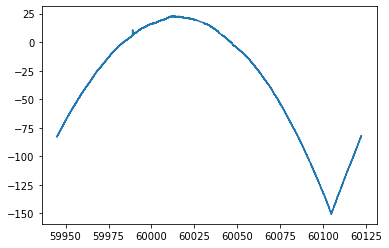

In [16]:
plt.plot(np.array(gps_combined['Epoch_mjd']),np.array(gps_combined['diff_CLK(ns)']))

In [17]:
Data_length= np.arange(0,177)
#print(Data_length)

In [18]:
### Loop to calculate fractional frequency slope for each data set
## (same method as done for 1 dataset above)

### calculate slope with polyfit and add to list

In [19]:
m_list = []                 ## list for slopes
mjd_list = []               ## list for mean mjd times

for n in Data_length :
    
    poi = data_list[n]                              ## 
    
    m,b0 = np.polyfit(poi['Epoch_mjd']*84600,poi['diff_CLK(ns)']*10**(-9), 1)     ## fit slope and c to dataset i
    
    m_list.append(m)                                ## add slope to list
    mjd_list.append(poi['Epoch_mjd'].mean())        ## get mean mjd time and add to list

#print(m_list)

In [20]:
## Plot ff vs time (mjd == # days since random day in the 70s). 
## Can see frequency offset increases/drifts over time until reset manually. 

## Note: gravitational redshift offset calculated using laser lab height and added to FF list

Text(0.5, 1.0, 'Plot of Fractional Frequency vs MJD (days)')

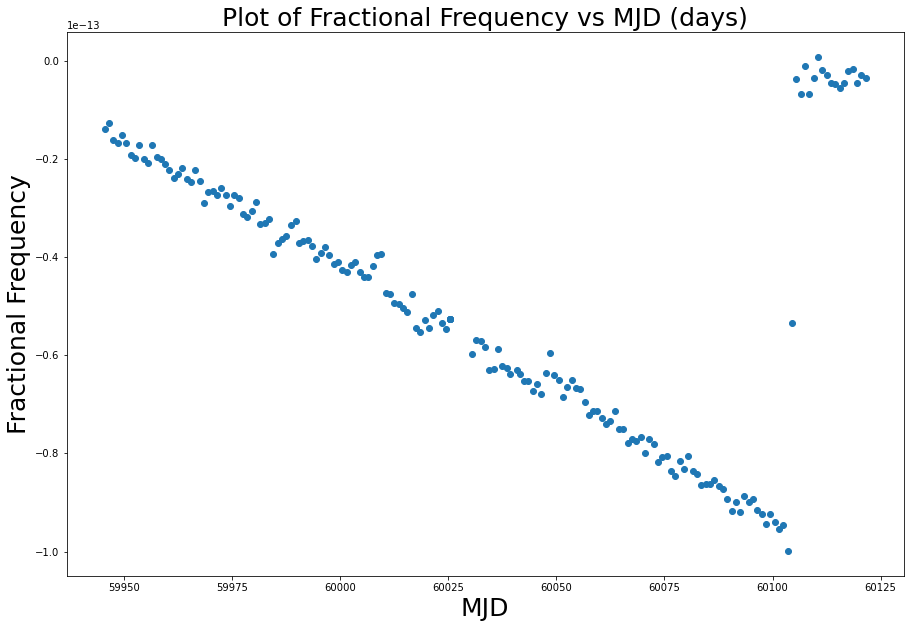

In [21]:
plt.figure(figsize=(15,10))

plt.scatter(mjd_list,np.array(m_list)-(9.81/(299792458)**2)*442.420)       ## add offset to y axis to reset to 0 
                                                                           ## offset due to gravitational redshift

plt.xlabel('MJD',fontsize=25)
plt.ylabel('Fractional Frequency',fontsize=25)
plt.title('Plot of Fractional Frequency vs MJD (days)',fontsize=25)

# 2. Read in and look at Cesium Clock Fountain

In [22]:
## Load first csf clock dataset

In [23]:
csf_file = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [59945.0]-[59976.0] 2023-01-01T00-00-00Z - 2023-02-01T00-00-00Z.txt',delimiter='\t')

In [24]:
## filter major outliers out of data by removing frequency more than 1e-12

csf_file[abs(csf_file['f0'])<1e-12]           

Bin Start UTC  Bin Start MJD Days  Bin Start Seconds  \
0    2023-01-01T00:00:00Z               59945                  0   
1    2023-01-01T01:00:00Z               59945               3600   
2    2023-01-01T02:00:00Z               59945               7200   
3    2023-01-01T03:00:00Z               59945              10800   
4    2023-01-01T04:00:00Z               59945              14400   
..                    ...                 ...                ...   
739  2023-01-31T19:00:00Z               59975              68400   
740  2023-01-31T20:00:00Z               59975              72000   
741  2023-01-31T21:00:00Z               59975              75600   
742  2023-01-31T22:00:00Z               59975              79200   
743  2023-01-31T23:00:00Z               59975              82800   

     Bin End MJD Days  Bin End Seconds            f0       uA (f0)  \
0               59945             3599  2.527610e-14  2.160460e-15   
1               59945             7199  2.407960e-14  2.134340e-15   
2               59945            10799  1.976620e-14  2.243780e-15   
3               59945            14399  2.924470e-14  2.267390e-15   
4               59945            17999  2.305520e-14  2.129630e-15   
..                ...              ...           ...           ...   
739             59975            71999  3.028420e-14  4.736990e-15   
740             59975            75599  2.001710e-14  4.273780e-15   
741             59975            79199  2.882610e-14  4.853340e-15   
742             59975            82799  3.137180e-14  4.600500e-15   
743             59975            86399  2.949060e-14  4.463650e-15   

          uB (f0)  Freq Diff (LD-HD)    uA (LD-HD)  ...       LD Freq  \
0    2.586000e-16      -9.004880e-15  4.061350e-15  ...  2.669250e-14   
1    2.586000e-16      -9.004480e-15  4.174300e-15  ...  2.549650e-14   
2    4.894000e-16      -2.451330e-14  4.298180e-15  ...  2.362540e-14   
3    2.781000e-16      -1.059910e-14  3.848220e-15  ...  3.091410e-14   
4    3.428000e-16      -1.526920e-14  3.989230e-15  ...  2.546040e-14   
..            ...                ...           ...  ...           ...   
739  3.171000e-16       1.278240e-14  8.484400e-15  ...  2.817270e-14   
740  2.034000e-16       1.924210e-15  9.816850e-15  ...  1.969840e-14   
741  2.186000e-16       4.557200e-15  1.165490e-14  ...  2.806960e-14   
742  2.455000e-16       7.360720e-15  8.825640e-15  ...  3.015060e-14   
743  2.000000e-16       2.220950e-16  8.886080e-15  ...  2.945370e-14   

          uA (LD)  Mean HD Signal (Vs)  uA (HD Sig)  Mean LD Signal (Vs)  \
0    1.800040e-15             0.041102     0.000009             0.005586   
1    1.771080e-15             0.041101     0.000009             0.005588   
2    1.865660e-15             0.041133     0.000009             0.005595   
3    1.905310e-15             0.041109     0.000009             0.005594   
4    1.774400e-15             0.041118     0.000009             0.005596   
..            ...                  ...          ...                  ...   
739  3.923010e-15             0.036897     0.000023             0.005231   
740  3.425350e-15             0.037054     0.000028             0.005266   
741  3.856650e-15             0.037152     0.000025             0.005289   
742  3.779080e-15             0.037177     0.000022             0.005290   
743  3.649140e-15             0.037100     0.000026             0.005288   

      uA (LD Sig)  No. of HD Points  No. of LD Points  \
0    7.455200e-07               159               938   
1    7.319950e-07               155               942   
2    8.059290e-07               156               940   
3    7.985550e-07               159               938   
4    7.489070e-07               155               942   
..            ...               ...               ...   
739  2.134250e-06                53               300   
740  2.169300e-06                52               330   
741  1.779390e-06                50               3

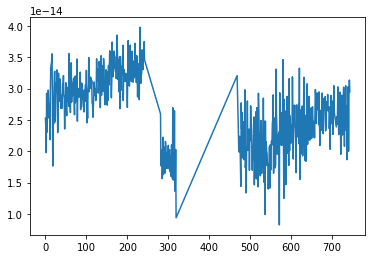

In [25]:
## Rename new filtered data set and plot 

new_csf=(csf_file[abs(csf_file['f0'])<1e-12])['f0']

plt.plot(new_csf)        ### plot data minus major outliers

In [26]:
##  Want to remove anything from data set outside bounds of about 2 standard deviations

## Do this using rolling means and standard deviations 
## Rolling mean == calculating mean of last x values (window), over whole dataset 
## creates a series of averages based on different subsets of data set.

## Rolling standard deviaton == same as mean w std.

## To create bounds - get rolling mean of dataset +/- 2 rolling std 
## want to remove anything outside of bounds.

In [27]:
# Calculate rolling standard deviation for first filtered data set

new_csf.rolling(window=24).std().dropna()

23     4.640143e-15
24     4.656163e-15
25     4.590331e-15
26     4.267169e-15
27     4.272523e-15
           ...     
739    3.762546e-15
740    3.926956e-15
741    3.948888e-15
742    4.106237e-15
743    4.136717e-15
Name: f0, Length: 528, dtype: float64

In [28]:
# Calculate rolling mean for first filtered data set

new_csf.rolling(window=24).mean().dropna()

23     2.788426e-14
24     2.785958e-14
25     2.806451e-14
26     2.852975e-14
27     2.855225e-14
           ...     
739    2.553362e-14
740    2.529782e-14
741    2.555426e-14
742    2.586155e-14
743    2.611368e-14
Name: f0, Length: 528, dtype: float64

In [29]:
## Create bounds to remove data points outside 2sd 

Bound1 = new_csf.rolling(window=24).mean().dropna() + 2*new_csf.rolling(window=24).std().dropna()
Bound2 = new_csf.rolling(window=24).mean().dropna() - 2*new_csf.rolling(window=24).std().dropna()

In [30]:
## Plot bounds against original to see if anything remains outside bounds

plt.plot(new_csf,'x')    

plt.plot(Bound1)
plt.plot(Bound2)

In [31]:
## Read in rest of csf data

csf_file1 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [59976.0]-[60004.0] 2023-02-01T00-00-00Z - 2023-03-01T00-00-00Z.txt',delimiter='\t')
csf_file2 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [60004.0]-[60035.0] 2023-03-01T00-00-00Z - 2023-04-01T00-00-00Z.txt',delimiter='\t')
csf_file3 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [60035.0]-[60065.0] 2023-04-01T00-00-00Z - 2023-05-01T00-00-00Z.txt',delimiter='\t')
csf_file4 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [60065.0]-[60096.0] 2023-05-01T00-00-00Z - 2023-06-01T00-00-00Z.txt',delimiter='\t')
csf_file5 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [60096.0]-[60126.0] 2023-06-01T00-00-00Z - 2023-07-01T00-00-00Z.txt',delimiter='\t')
csf_file6 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [59884.0]-[59914.0] 2022-11-01T00-00-00Z - 2022-12-01T00-00-00Z.txt',delimiter='\t')
csf_file7 = pd.read_csv('/eos/user/e/elsweene/SWAN_projects/CsF_files/Alpha 1-hour data [59914.0]-[59945.0] 2022-12-01T00-00-00Z - 2022-13-01T00-00-00Z.txt',delimiter='\t')

In [32]:
## Add all files to list

all_csf_files = [csf_file,csf_file1,csf_file2,csf_file3,csf_file4,csf_file5,csf_file6,csf_file7]

In [33]:
## Concatenate (fancy word for combine) csf data files into 1 

frame = pd.concat(all_csf_files, axis=0, ignore_index=True)

In [34]:
#plt.plot(frame['f0'])

In [35]:
## filter this concatenated csf data - remove major outliers (anything above .5e-12)

csf_combined=(frame[abs(frame['f0'])<.5e-12])

## plot to see whats left
plt.plot(csf_combined['f0'])

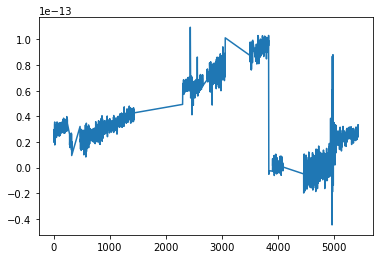

In [36]:
## filter filtered data to remove some outliers (anything greater than 1.1e-13)

filter2=(csf_combined[(csf_combined['f0'])<1.1e-13])

plt.plot(filter2['f0'])

In [37]:
## Create new bounds from new filtered once data using rolling means and sd

Bound3 = csf_combined['f0'].rolling(window=24).mean().dropna() + 2*csf_combined['f0'].rolling(window=24).std().dropna()  # bound after 1 filter
Bound4 = csf_combined['f0'].rolling(window=24).mean().dropna() - 2*csf_combined['f0'].rolling(window=24).std().dropna()

In [38]:
## Create new bounds from new filtered twice data using rolling mean and sd

Bound3 = csf_combined['f0'].rolling(window=24).mean().dropna() + 2*csf_combined['f0'].rolling(window=24).std().dropna()  # bound after 1 filter
Bound4 = csf_combined['f0'].rolling(window=24).mean().dropna() - 2*csf_combined['f0'].rolling(window=24).std().dropna()

Bound5 = filter2['f0'].rolling(window=24).mean().dropna() + 2*filter2['f0'].rolling(window=24).std().dropna()  # bound after 2
Bound6 = filter2['f0'].rolling(window=24).mean().dropna() - 2*filter2['f0'].rolling(window=24).std().dropna()

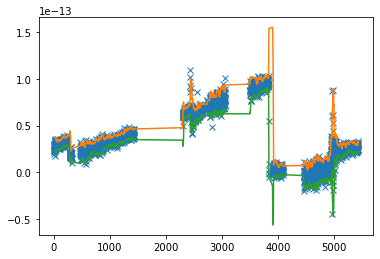

In [39]:
## plot twice filtered data against bounds to see if any outliers remaining

plt.plot(filter2['f0'],'x')     

plt.plot(Bound5)
plt.plot(Bound6)

#plt.ylim(0,2e-13)

In [40]:
 ## add upper bound column to twice filtered data set

filter2['UpperBound']=Bound5       

/tmp/ipykernel_857/2960970359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['UpperBound']=Bound5


In [41]:
## add lower bound column to twice filtered data set 

filter2['LowerBound']=Bound6        

/tmp/ipykernel_857/70791572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['LowerBound']=Bound6


In [42]:
## Look at new data set to check for new columns

filter2

Bin Start UTC  Bin Start MJD Days  Bin Start Seconds  \
0     2023-01-01T00:00:00Z               59945                  0   
1     2023-01-01T01:00:00Z               59945               3600   
2     2023-01-01T02:00:00Z               59945               7200   
3     2023-01-01T03:00:00Z               59945              10800   
4     2023-01-01T04:00:00Z               59945              14400   
...                    ...                 ...                ...   
5419  2022-12-31T19:00:00Z               59944              68400   
5420  2022-12-31T20:00:00Z               59944              72000   
5421  2022-12-31T21:00:00Z               59944              75600   
5422  2022-12-31T22:00:00Z               59944              79200   
5423  2022-12-31T23:00:00Z               59944              82800   

      Bin End MJD Days  Bin End Seconds            f0       uA (f0)  \
0                59945             3599  2.527610e-14  2.160460e-15   
1                59945             7199  2.407960e-14  2.134340e-15   
2                59945            10799  1.976620e-14  2.243780e-15   
3                59945            14399  2.924470e-14  2.267390e-15   
4                59945            17999  2.305520e-14  2.129630e-15   
...                ...              ...           ...           ...   
5419             59944            71999  2.697570e-14  2.261270e-15   
5420             59944            75599  2.980350e-14  2.273110e-15   
5421             59944            79199  3.349230e-14  2.231720e-15   
5422             59944            82799  2.421080e-14  2.153470e-15   
5423             59944            86399  2.757020e-14  2.232450e-15   

           uB (f0)  Freq Diff (LD-HD)    uA (LD-HD)  ...  Mean HD Signal (Vs)  \
0     2.586000e-16      -9.004880e-15  4.061350e-15  ...             0.041102   
1     2.586000e-16      -9.004480e-15  4.174300e-15  ...             0.041101   
2     4.894000e-16      -2.451330e-14  4.298180e-15  ...             0.041133   
3     2.781000e-16      -1.059910e-14  3.848220e-15  ...             0.041109   
4     3.428000e-16      -1.526920e-14  3.989230e-15  ...             0.041118   
...            ...                ...           ...  ...                  ...   
5419  3.819000e-16      -1.793850e-14  4.838060e-15  ...             0.041118   
5420  2.118000e-16      -3.849550e-15  4.525450e-15  ...             0.041073   
5421  2.008000e-16      -1.000470e-15  4.340530e-15  ...             0.041006   
5422  2.923000e-16      -1.173380e-14  4.254440e-15  ...             0.041094   
5423  3.039000e-16      -1.257300e-14  4.332710e-15  ...             0.041119   

      uA (HD Sig)  Mean LD Signal (Vs)   uA (LD Sig)  No. of HD Points  \
0        0.000009             0.005586  7.455200e-07               159   
1        0.000009             0.005588  7.319950e-07               155   
2        0.000009             0.005595  8.059290e-07               156   
3        0.000009             0.005594  7.985550e-07               159   
4        0.000009             0.005596  7.489070e-07               155   
...           ...                  ...           ...               ...   
5419     0.000009             0.005573  7.293570e-07               155   
5420     0.000014             0.005567  9.125400e-07               156   
5421     0.000013             0.005564  9.138010e-07               159   
5422     0.000009             0.005578  7.849440e-07               155   
5423     0.000009             0.005587  7.371540e-07               156   

      No. of LD Points                                       HD Deadtimes  \
0                  938  [(0, 2), (12, 114), (127, 229), (242, 344), (3...   
1                  942  [(3600, 3675), (3688, 3790), (3803, 3905), (39...   
2                  940  [(7200, 7237), (7250, 7352), (7365, 7467), (74...   
3                  938  [(10800, 10802), (10811, 10913), (10926, 11028...   
4                  942  [(14400, 14475), (14488, 14590), (14603, 14704...   
...    

In [43]:
filter2['f0']         ### look at f0 in filtered data

0       2.527610e-14
1       2.407960e-14
2       1.976620e-14
3       2.924470e-14
4       2.305520e-14
            ...     
5419    2.697570e-14
5420    2.980350e-14
5421    3.349230e-14
5422    2.421080e-14
5423    2.757020e-14
Name: f0, Length: 3321, dtype: float64

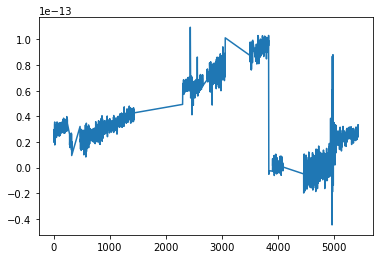

In [44]:
plt.plot(filter2['f0'])

In [45]:
## Remove remaining data outliers from outside bounds
### First remove outliers from those above upper bound

Outside_Upper = filter2[(filter2['f0'])<filter2['UpperBound']]

In [46]:
#Outside_Upper

In [47]:
### Next remove outliers from those below lower band

Outside_Bounds = Outside_Upper[(Outside_Upper['f0'])>Outside_Upper['LowerBound']]

In [48]:
## look at new data set

Outside_Bounds          

Bin Start UTC  Bin Start MJD Days  Bin Start Seconds  \
23    2023-01-01T23:00:00Z               59945              82800   
24    2023-01-02T00:00:00Z               59946                  0   
25    2023-01-02T01:00:00Z               59946               3600   
26    2023-01-02T02:00:00Z               59946               7200   
27    2023-01-02T03:00:00Z               59946              10800   
...                    ...                 ...                ...   
5418  2022-12-31T18:00:00Z               59944              64800   
5419  2022-12-31T19:00:00Z               59944              68400   
5420  2022-12-31T20:00:00Z               59944              72000   
5422  2022-12-31T22:00:00Z               59944              79200   
5423  2022-12-31T23:00:00Z               59944              82800   

      Bin End MJD Days  Bin End Seconds            f0       uA (f0)  \
23               59945            86399  3.276710e-14  2.123050e-15   
24               59946             3599  2.468390e-14  2.232590e-15   
25               59946             7199  2.899790e-14  2.150420e-15   
26               59946            10799  3.093180e-14  2.285060e-15   
27               59946            14399  2.978470e-14  2.025320e-15   
...                ...              ...           ...           ...   
5418             59944            68399  2.510980e-14  2.249820e-15   
5419             59944            71999  2.697570e-14  2.261270e-15   
5420             59944            75599  2.980350e-14  2.273110e-15   
5422             59944            82799  2.421080e-14  2.153470e-15   
5423             59944            86399  2.757020e-14  2.232450e-15   

           uB (f0)  Freq Diff (LD-HD)    uA (LD-HD)  ...  Mean HD Signal (Vs)  \
23    2.302000e-16      -6.185220e-15  4.064380e-15  ...             0.041065   
24    4.074000e-16      -1.932050e-14  4.077440e-15  ...             0.041204   
25    3.659000e-16      -1.670990e-14  4.091230e-15  ...             0.041224   
26    2.796000e-16      -1.068680e-14  4.210390e-15  ...             0.041254   
27    3.399000e-16      -1.507160e-14  3.838710e-15  ...             0.041232   
...            ...                ...           ...  ...                  ...   
5418  3.259000e-16      -1.421950e-14  4.628840e-15  ...             0.041101   
5419  3.819000e-16      -1.793850e-14  4.838060e-15  ...             0.041118   
5420  2.118000e-16      -3.849550e-15  4.525450e-15  ...             0.041073   
5422  2.923000e-16      -1.173380e-14  4.254440e-15  ...             0.041094   
5423  3.039000e-16      -1.257300e-14  4.332710e-15  ...             0.041119   

      uA (HD Sig)  Mean LD Signal (Vs)   uA (LD Sig)  No. of HD Points  \
23       0.000011             0.005633  8.265500e-07               158   
24       0.000011             0.005639  8.974580e-07               157   
25       0.000011             0.005634  8.002470e-07               155   
26       0.000011             0.005626  8.869870e-07               158   
27       0.000010             0.005612  8.153850e-07               157   
...           ...                  ...           ...               ...   
5418     0.000010             0.005562  8.023850e-07               160   
5419     0.000009             0.005573  7.293570e-07               155   
5420     0.000014             0.005567  9.125400e-07               156   
5422     0.000009             0.005578  7.849440e-07               155   
5423     0.000009             0.005587  7.371540e-07               156   

      No. of LD Points                                       HD Deadtimes  \
23                 939  [(82800, 82831), (82844, 82946), (82959, 83061...   
24                 940  [(0, 3), (6, 108), (121, 223), (236, 337), (35...   
25                 942  [(3600, 3669), (3682, 3784), (3797, 3899), (39...   
26                 938  [(7200, 7230), (7243, 7345), (7358, 7460), (74...   
27                 940  [(10800, 10802), (10805, 10907), (10920, 11022...   
...    

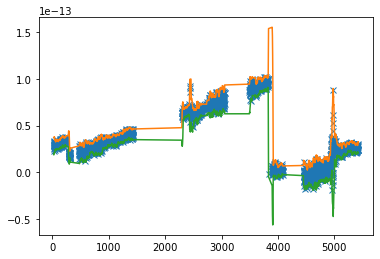

In [49]:
## Plot fully filtered dataset (Outside_Bounds) with Bounds and check all data points inside bounds
## note : index vs F0

plt.plot(Outside_Bounds['f0'],'x')

plt.plot(Bound5)
plt.plot(Bound6)

In [50]:
F0_lessmean = Outside_Bounds['f0']-filter2['f0'].rolling(window=24).mean().dropna()

(array([ 2.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  3.,  3.,
         6.,  3.,  3.,  8., 10., 18., 18., 19., 20., 34., 31., 46., 50.,
        62., 57., 72., 73., 73., 74., 60., 68., 54., 46., 37., 49., 43.,
        20., 21., 19.,  7.,  6.,  5.,  3.,  4.,  2.,  1.,  5.]),
 array([-1.28391750e-14, -1.24097469e-14, -1.19803188e-14, -1.15508907e-14,
        -1.11214627e-14, -1.06920346e-14, -1.02626065e-14, -9.83317842e-15,
        -9.40375033e-15, -8.97432225e-15, -8.54489417e-15, -8.11546608e-15,
        -7.68603800e-15, -7.25660992e-15, -6.82718183e-15, -6.39775375e-15,
        -5.96832567e-15, -5.53889758e-15, -5.10946950e-15, -4.68004142e-15,
        -4.25061333e-15, -3.82118525e-15, -3.39175717e-15, -2.96232908e-15,
        -2.53290100e-15, -2.10347292e-15, -1.67404483e-15, -1.24461675e-15,
        -8.15188667e-16, -3.85760583e-16,  4.36675000e-17,  4.73095583e-16,
         9.02523667e-16,  1.33195175e-15,  1.76137983e-15,  2.19080792e-15,
         2.62023600e-15,  3.0496

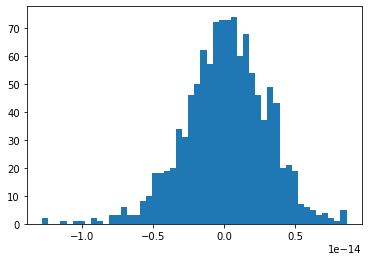

In [51]:
F0_lessmean_interest = F0_lessmean[:1200]
plt.hist(np.array(F0_lessmean_interest),bins=50)

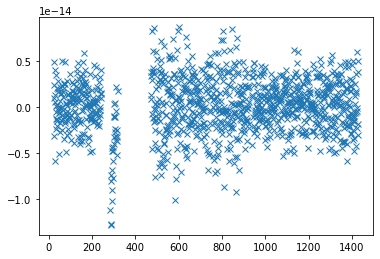

In [52]:
plt.plot(F0_lessmean_interest,'x')

In [53]:
F0_unfiltered =frame['f0']-filter2['f0'].rolling(window=24).mean().dropna()

F0_cut_unfiltered =F0_unfiltered[:1200].dropna()
len(F0_cut_unfiltered)

971

In [54]:
frame['f0']

0       2.527610e-14
1       2.407960e-14
2       1.976620e-14
3       2.924470e-14
4       2.305520e-14
            ...     
5419    2.697570e-14
5420    2.980350e-14
5421    3.349230e-14
5422    2.421080e-14
5423    2.757020e-14
Name: f0, Length: 5424, dtype: float64

In [55]:
plt.figure(figsize=(15,10))

mu, std = norm.fit(shifted)
print(mu, std)

test_array = norm.rvs(loc=mu,scale=std,size=971)

plt.hist(test_array,bins=30,density=True,alpha=.2)
plt.hist(shifted,bins=30,density=True,alpha=.2)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x,p)

plt.show()

NameError: name 'shifted' is not defined

<Figure size 1080x720 with 0 Axes>

In [56]:
F0_cut_unfiltered

23      4.882842e-15
24     -3.175683e-15
25      9.333875e-16
26      2.402054e-15
27      1.232454e-15
            ...     
1195    1.107450e-15
1196   -4.439617e-15
1197   -9.685208e-16
1198    3.643758e-15
1199    1.916996e-15
Name: f0, Length: 971, dtype: float64

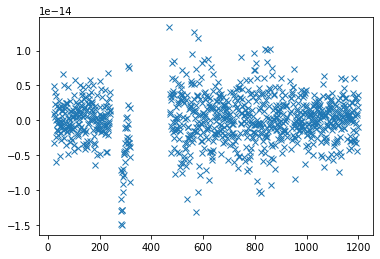

In [57]:
plt.plot(F0_cut_unfiltered,'x')

In [58]:
## Convert time in CSf dataset to same as gps time (days)

Outside_Bounds['TimeStamp'] = Outside_Bounds['Bin Start MJD Days']+ (Outside_Bounds['Bin End Seconds']/86400)

/tmp/ipykernel_857/1371770496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Outside_Bounds['TimeStamp'] = Outside_Bounds['Bin Start MJD Days']+ (Outside_Bounds['Bin End Seconds']/86400)


In [59]:
## Zoom into data to ignore part where clock broke

Truncated_Time_data = Outside_Bounds[(Outside_Bounds['TimeStamp'])>59960]

In [60]:
Truncated_Time_data

Bin Start UTC  Bin Start MJD Days  Bin Start Seconds  \
471   2023-01-20T15:00:00Z               59964              54000   
472   2023-01-20T16:00:00Z               59964              57600   
473   2023-01-20T17:00:00Z               59964              61200   
474   2023-01-20T18:00:00Z               59964              64800   
475   2023-01-20T19:00:00Z               59964              68400   
...                    ...                 ...                ...   
4081  2023-06-20T01:00:00Z               60115               3600   
4082  2023-06-20T02:00:00Z               60115               7200   
4083  2023-06-20T03:00:00Z               60115              10800   
4084  2023-06-20T04:00:00Z               60115              14400   
4085  2023-06-20T05:00:00Z               60115              18000   

      Bin End MJD Days  Bin End Seconds            f0       uA (f0)  \
471              59964            57599  2.269700e-14  1.726480e-14   
472              59964            61199  2.023900e-14  4.856220e-15   
473              59964            64799  1.988450e-14  4.465520e-15   
474              59964            68399  2.239550e-14  5.057780e-15   
475              59964            71999  2.218990e-14  4.416730e-15   
...                ...              ...           ...           ...   
4081             60115             7199  1.752220e-15  2.448350e-15   
4082             60115            10799 -2.606460e-15  2.826540e-15   
4083             60115            14399  4.593800e-16  2.748480e-15   
4084             60115            17999  1.561330e-15  2.825260e-15   
4085             60115            21599  3.973550e-16  4.962790e-15   

           uB (f0)  Freq Diff (LD-HD)    uA (LD-HD)  ...  uA (HD Sig)  \
471   1.227000e-15       6.642930e-14  2.829710e-14  ...     0.000011   
472   2.467000e-16       7.914020e-15  8.275400e-15  ...     0.000021   
473   2.075000e-16       3.016540e-15  7.815190e-15  ...     0.000015   
474   2.194000e-16       4.894430e-15  1.064660e-14  ...     0.000025   
475   2.000000e-16       4.185780e-17  8.494030e-15  ...     0.000025   
...            ...                ...           ...  ...          ...   
4081  2.055000e-16       2.425310e-15  4.930380e-15  ...     0.000054   
4082  2.003000e-16      -5.247510e-16  4.989550e-15  ...     0.000038   
4083  2.154000e-16       4.114240e-15  5.574640e-15  ...     0.000031   
4084  2.127000e-16       3.730080e-15  5.374690e-15  ...     0.000021   
4085  2.034000e-16       1.904380e-15  7.470780e-15  ...     0.000030   

      Mean LD Signal (Vs)  uA (LD Sig)  No. of HD Points  No. of LD Points  \
471              0.005062     0.000003                 5                18   
472              0.005086     0.000001                50               312   
473              0.005095     0.000001                55               315   
474              0.005112     0.000001                50               315   
475              0.005171     0.000002                55               311   
...                   ...          ...               ...               ...   
4081             0.007972     0.000003               155               941   
4082             0.007788     0.000003               160               934   
4083             0.007567     0.000002               155               942   
4084             0.007587     0.000001               155               942   
4085             0.007563     0.000002                53               303   

                                           HD Deadtimes  \
471                    [(54000, 57526), (57539, 57600)]   
472   [(57600, 57870), (57883, 58213), (58226, 58556...   
473   [(61200, 61304), (61317, 61647), (61660, 61991...   
474   [(64800, 65082), (65095, 65425), (65438, 65768...   
475   [(68400, 68516), (68529, 68860), (68873, 69203...   
...                                                 ...   
4081  [(3600, 3643), (3656, 3757), (3770, 3872), (38...   
4082  [(7200, 7204), (7217, 7319), (7332, 743

In [61]:
rolling_mean = np.array(Truncated_Time_data['f0'].rolling(window=24).mean().dropna())

In [62]:
shifted = np.array(Truncated_Time_data['f0'][:875]-rolling_mean[:875])

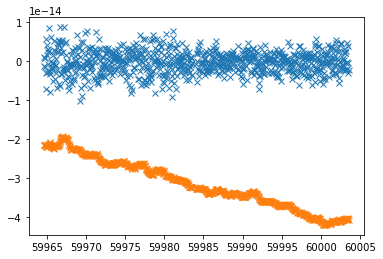

In [63]:
plt.plot(Truncated_Time_data['TimeStamp'][:875],shifted,'x')
plt.plot(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875],'x')

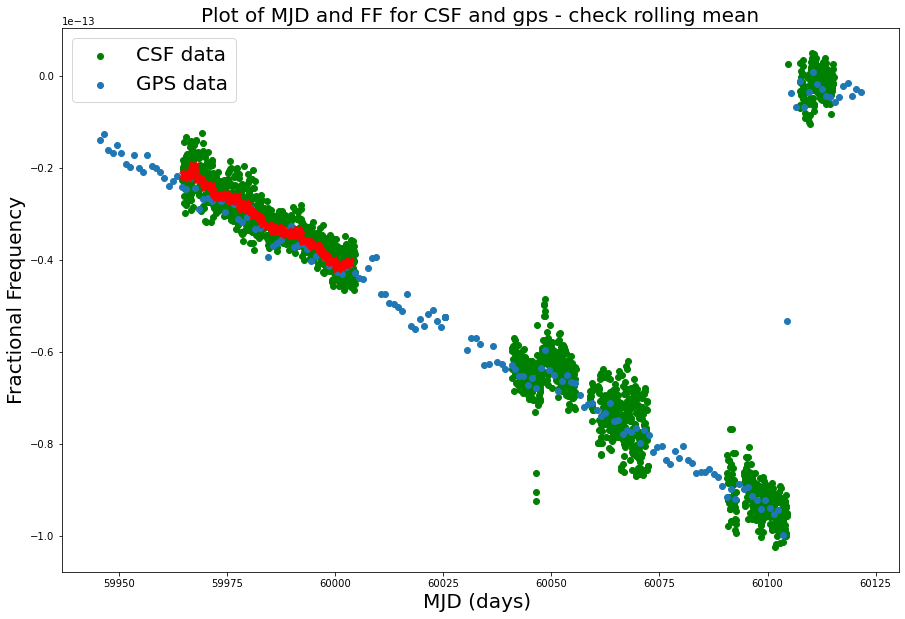

In [64]:
## Plot of CSF data vs gps data 

plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],color='g',label='CSF data')
plt.scatter(mjd_list,np.array(m_list)-(9.81/(299792458)**2)*442.420,label='GPS data')
plt.plot(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875],'x',color='r')

plt.title('Plot of MJD and FF for CSF and gps - check rolling mean',fontsize=20)
plt.xlabel('MJD (days) ',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

In [65]:
m_rm, b_rm = np.polyfit(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875], 1)

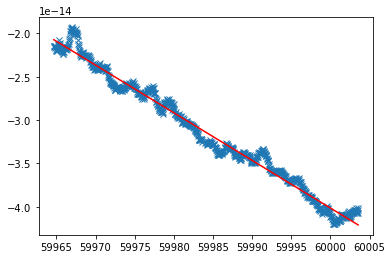

In [66]:
plt.plot(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875],'x')
plt.plot(Truncated_Time_data['TimeStamp'][:875], m_rm*np.array(Truncated_Time_data['TimeStamp'][:875]) + b_rm,'r')

In [67]:
def mean_line(x):
    
    line = m_rm*x+b_rm
    return line

In [68]:
y = mean_line(60006)

In [69]:
## add random noise

add_noise = norm.rvs(loc=y,scale=std,size=1)

NameError: name 'std' is not defined

In [70]:
plt.scatter(60006,add_noise)
plt.plot(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875],'x')
plt.plot(Truncated_Time_data['TimeStamp'][:875], m_rm*np.array(Truncated_Time_data['TimeStamp'][:875]) + b_rm,'r')

NameError: name 'add_noise' is not defined

In [71]:
rolling_mean_range = np.arange(0,874,1)

In [72]:
list_differences = []

for i in rolling_mean_range:
    
    x1 = -1*rolling_mean[i]
    x2 = -1*rolling_mean[i+1]
    
    diff = x1 - x2
    
    list_differences.append(diff)

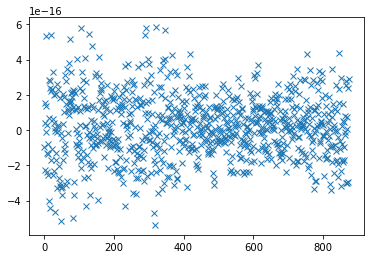

In [74]:
plt.plot(list_differences,'x')

In [ ]:
plt.hist(list_differences,bins=50)

mu1, std1 = norm.fit(list_differences)
print(mu1, std1)

#test_array = norm.rvs(loc=mu,scale=std,size=971)

#plt.hist(test_array,bins=30,density=True,alpha=.2)
plt.hist(list_differences,bins=30,density=True,alpha=.2)

xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)
plt.plot(x1,p1)

In [91]:
later_times1 = np.arange(60006,60325,1/24)

In [113]:
RW_Noise_data = []
M= mu1
S = std1

for i in later_times1:
    #print(M)
    y_gen1 = mean_line(i)
    draw_noise = norm.rvs(loc=M,scale=S,size=1)
    
    new_freq = y_gen1 + draw_noise
    
    RW_Noise_data.append(new_freq)
    
    M = draw_noise
    #print(M)

In [119]:
RW_Noise_data

[array([-4.33512622e-14]),
 array([-4.31755881e-14]),
 array([-4.33227586e-14]),
 array([-4.31851507e-14]),
 array([-4.29509066e-14]),
 array([-4.29283035e-14]),
 array([-4.29053614e-14]),
 array([-4.26438605e-14]),
 array([-4.26612935e-14]),
 array([-4.28592482e-14]),
 array([-4.24828468e-14]),
 array([-4.24774297e-14]),
 array([-4.22800584e-14]),
 array([-4.21676531e-14]),
 array([-4.2079071e-14]),
 array([-4.19309039e-14]),
 array([-4.18249309e-14]),
 array([-4.17676146e-14]),
 array([-4.12277744e-14]),
 array([-4.07969234e-14]),
 array([-4.1010548e-14]),
 array([-4.08123233e-14]),
 array([-4.10559446e-14]),
 array([-4.10237722e-14]),
 array([-4.09606481e-14]),
 array([-4.09319653e-14]),
 array([-4.14931029e-14]),
 array([-4.16192487e-14]),
 array([-4.14519849e-14]),
 array([-4.14813518e-14]),
 array([-4.17005765e-14]),
 array([-4.17673736e-14]),
 array([-4.18565255e-14]),
 array([-4.19107548e-14]),
 array([-4.21019601e-14]),
 array([-4.2208489e-14]),
 array([-4.21914272e-14]),
 arr

In [122]:
plt.plot(later_times1,RW_Noise_data,'x')
plt.plot(Truncated_Time_data['TimeStamp'], m_rm*np.array(Truncated_Time_data['TimeStamp']) + b_rm,'r')

In [94]:
index_array = np.arange(0,7656,1)

In [95]:
#later_times = np.arange()

In [96]:
RW_Noise_array = np.array(RW_Noise_data)
len(RW_Noise_array)

7656

In [116]:
generated_freq = []

for i in index_array:
    
    y_gen = RW_Noise_array[i]
    add_noise = norm.rvs(y_gen,scale=std,size=1)
    a = add_noise[0]
    
#    new_freq = y_gen + add_noise
    
    generated_freq.append(a)

In [118]:
#generated_freq

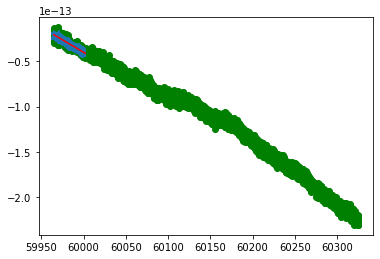

In [102]:
plt.plot(Truncated_Time_data['TimeStamp'][:875],-1*rolling_mean[:875],'x')
plt.scatter(Truncated_Time_data['TimeStamp'][:875],-1*Truncated_Time_data['f0'][:875],color='g',label='CSF data')
plt.plot(Truncated_Time_data['TimeStamp'], m_rm*np.array(Truncated_Time_data['TimeStamp']) + b_rm,'r')
plt.plot(later_times1,generated_freq,'o',color='g')

In [406]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [407]:
generated_data_freq = np.concatenate((-1*Truncated_Time_data['f0'][:875],generated_freq))

In [408]:
later_times = np.arange(59964.666655,60325,1/24)

In [409]:
Truncated_Time_data['TimeStamp']

471     59964.666655
472     59964.708322
473     59964.749988
474     59964.791655
475     59964.833322
            ...     
4081    60115.083322
4082    60115.124988
4083    60115.166655
4084    60115.208322
4085    60115.249988
Name: TimeStamp, Length: 1972, dtype: float64

In [410]:
generated_data_time = np.concatenate((Truncated_Time_data['TimeStamp'][:875],later_times1))

In [411]:
## Convert data into dataframe

gen_data = {'Time': generated_data_time,
        'Generated FF': generated_data_freq }
  
df_generated_CSF = pd.DataFrame(gen_data, columns=['Time', 'Generated FF'])

In [412]:
df_generated_CSF.to_csv(save_dir + "1year_generated_data.csv", index=False)

In [413]:
plt.plot(df_generated_CSF['Time'],df_generated_CSF['Generated FF'],'x')

In [165]:
## Plot of CSF data vs gps data 

plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='CSF data')
plt.scatter(mjd_list,np.array(m_list)-(9.81/(299792458)**2)*442.420,label='GPS data')

plt.title('Plot of MJD and FF for CSF and gps',fontsize=20)
plt.xlabel('MJD (days) ',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

In [57]:
## Zoom into specific section of data with no gaps (cut left side first then right side)

Zoom_in_left_CFS = Outside_Bounds[(Outside_Bounds['TimeStamp'])>59960]

In [58]:
Zoom_in_CFS = Zoom_in_left_CFS[(Zoom_in_left_CFS['TimeStamp'])<60010]

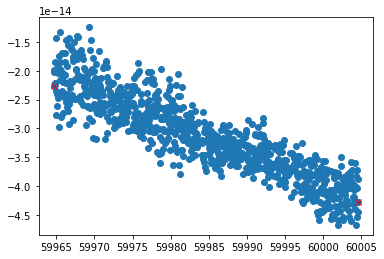

In [59]:
#plt.plot(Zoom_in_CFS['TimeStamp'],'x')

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'])
plt.plot(Zoom_in_CFS['TimeStamp'].to_numpy()[-1],-1*Zoom_in_CFS['f0'].to_numpy()[-1], 'x',color='r')
plt.plot(Zoom_in_CFS['TimeStamp'].to_numpy()[0],-1*Zoom_in_CFS['f0'].to_numpy()[0], 'x',color='r')

In [60]:
Zoom_in_CFS['f0'].to_numpy()[0]-Zoom_in_CFS['f0'].to_numpy()[-1]

-1.99933e-14

In [61]:
##

data = {'MJD': mjd_list,
        'FF': m_list}
  
df_gps = pd.DataFrame(data, columns=['MJD', 'FF'])
  
df_gps

MJD            FF
0    59945.499826  3.439460e-14
1    59946.499826  3.566649e-14
2    59947.499826  3.220757e-14
3    59948.499826  3.151476e-14
4    59949.499826  3.314302e-14
..            ...           ...
172  60117.500174  4.612139e-14
173  60118.502430  4.658388e-14
174  60119.500868  4.377720e-14
175  60120.500694  4.532837e-14
176  60121.500347  4.467503e-14

[177 rows x 2 columns]

In [62]:
Zoom_in_left_gps = df_gps[df_gps['MJD']>59960]

Zoom_in_left_gps

MJD            FF
15   59960.499826  2.605713e-14
16   59961.500173  2.439146e-14
17   59962.500000  2.527415e-14
18   59963.499826  2.646681e-14
19   59964.499826  2.409279e-14
..            ...           ...
172  60117.500174  4.612139e-14
173  60118.502430  4.658388e-14
174  60119.500868  4.377720e-14
175  60120.500694  4.532837e-14
176  60121.500347  4.467503e-14

[162 rows x 2 columns]

In [63]:
Zoom_in_gps = Zoom_in_left_gps[(Zoom_in_left_gps['MJD'])<60010]

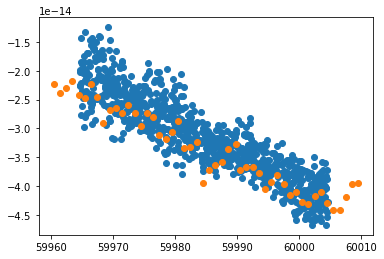

In [64]:
#plt.plot(Zoom_in_gps['MJD'],'x')

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'])
plt.scatter(Zoom_in_gps['MJD'],Zoom_in_gps['FF']-(9.81/(299792458)**2)*442.420)

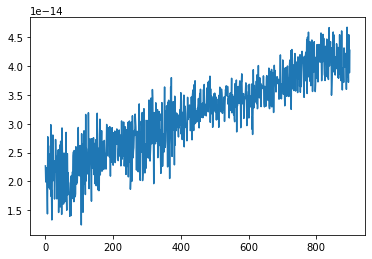

In [65]:
t = np.logspace(0,6,100)  # tau values from 
y =  np.array(Zoom_in_CFS['f0'])

r = 1/3600  

plt.plot(y)
#print(y)

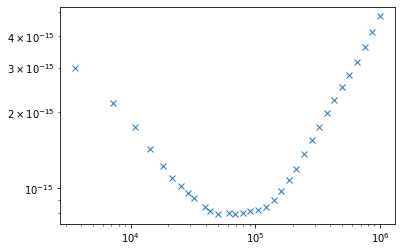

In [66]:
(t2, ad, ade, adn) = at.oadev(y, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

#(taus, adevs, errors, ns) = at.oadev(y)
#plt.loglog(taus,adevs)

plt.loglog(t2, ad,'x') # Plot the results

# 3. Steer in Steps - 6 hrs
#### 3.1 For zoomed in data - CSF

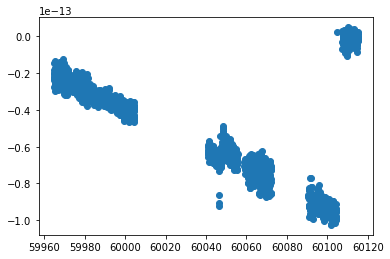

In [67]:
plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'])          ##look at different filtered data sets 

In [68]:
print(Truncated_Time_data['TimeStamp'])

471     59964.666655
472     59964.708322
473     59964.749988
474     59964.791655
475     59964.833322
            ...     
4081    60115.083322
4082    60115.124988
4083    60115.166655
4084    60115.208322
4085    60115.249988
Name: TimeStamp, Length: 1972, dtype: float64


In [69]:
plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'])         ## start with this zoomed in section

In [70]:
Zoom_in_CFS['TimeStamp']

471     59964.666655
472     59964.708322
473     59964.749988
474     59964.791655
475     59964.833322
            ...     
1425    60004.416655
1426    60004.458322
1427    60004.499988
1428    60004.541655
1429    60004.583322
Name: TimeStamp, Length: 900, dtype: float64

In [71]:
Time_cfs_array = np.array(Zoom_in_CFS['TimeStamp'])            ## create array of just time column to allow indexing

In [72]:
F0_cfs_array = np.array(Zoom_in_CFS['f0'])                    ## create array of just frequency column to allow indexing

In [73]:
Time_cfs_array[0]+6                 ## check you can index/manipulate

59970.666655092595

In [74]:
sixhr_cut = Zoom_in_CFS[(Zoom_in_CFS['TimeStamp'])< (Time_cfs_array[0]+.25)]        ## make first 6 hr cut 

#Zoom_in_gps = Zoom_in_left_gps[(Zoom_in_left_gps['MJD'])<60010]

In [75]:
#sixhr_cut

In [76]:
plt.scatter(sixhr_cut['TimeStamp'],-1*sixhr_cut['f0'])      ### plot data and get slope

m1,b1 = np.polyfit(sixhr_cut['TimeStamp'],-1*sixhr_cut['f0'], 1)
print(m1,b1)
# print(m1,b1)
step = m1*(sixhr_cut['TimeStamp'].to_numpy()[-1])  + b1     ## step size == slope of data from 6hours

plt.plot(np.array(sixhr_cut['TimeStamp']), m1*np.array(sixhr_cut['TimeStamp']) + b1,'r')
# plt.title('Plot of first 6 hour cut')
plt.plot(np.array(sixhr_cut['TimeStamp'])[-1], step, 'x')
# plt.hlines(step,59964, 59966)

8.80066285617485e-15 -5.277507084667605e-10


In [77]:
step = m1*(sixhr_cut['TimeStamp'].to_numpy()[-1])  + b1     ## step size == slope of data from 6hours
step

-2.006048095219831e-14

In [78]:
F0_cfs_array[0]-step   ##test 

4.2757480952198315e-14

In [79]:
list_times = Time_cfs_array.tolist()       ## turn time array into list to find index

In [80]:
### Start at t = 6 
### step at time t=6 == f0[t=6]
### Add step to all frequencies from this index onwards
### Repeat

In [81]:
F0_cfs_array = np.array(Zoom_in_CFS['f0'])

len(F0_cfs_array)

900

In [82]:
run = np.arange(0,893,6)       ### RANGE for loop
#run
F0_cfs_array = np.array(Zoom_in_CFS['f0'])

In [83]:
## Loop

i = 0
F0_cfs_array = np.array(Zoom_in_CFS['f0'])
steps_6 = []

for i in run:
    
    m1,b1 = np.polyfit(Time_cfs_array[i:i+6],F0_cfs_array[i:i+6], 1)
    #print(m1,b1)
    step_f0 = m1*(Time_cfs_array[i+5]) + b1 
    #print(step_f0)
    #print((Time_cfs_array[i+5]))
    steps_6.append(step_f0)
    
    
    F0_cfs_array[i:] -= step_f0     # add step to all frequencies from this index on

In [84]:
#steps_6

In [85]:
Time_cfs_array[i:i+6]

array([60004.12498843, 60004.16665509, 60004.20832176, 60004.24998843,
       60004.29165509, 60004.33332176])

In [86]:
plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'],label='Raw')
plt.scatter(Time_cfs_array,-1*F0_cfs_array,label='Shifted after 6 hrs')

# plt.ylim(-.1,.1)

plt.title('Plot of Fractional Frequency corrected by step every 6 hrs, CSF',fontsize=25)
plt.xlabel('MJD (days)',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)
plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\Zoomed -in 6hr.png")

In [87]:
### Calculate overlapping Allan Deviation

In [88]:
t = np.logspace(0,6,100)  # tau values from 
y1 = F0_cfs_array

r = 1/3600 

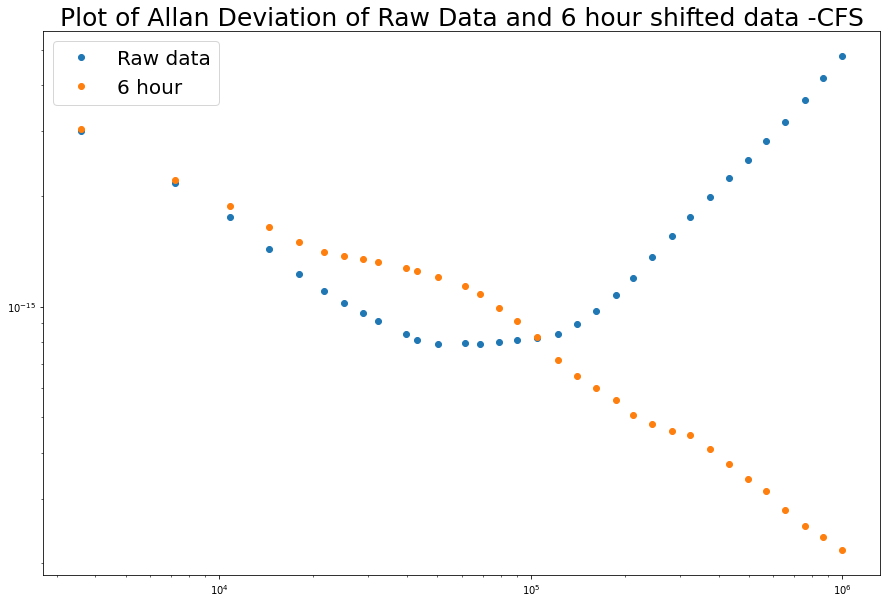

In [89]:
plt.figure(figsize=(15,10))
(t3, ad1, ade, adn) = at.oadev(y1, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t3, ad1,'o',label='6 hour') # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 6 hour shifted data -CFS',fontsize=25)
plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\AD - zoomed in 6hr.png")

# 4. Steer in Steps - 24 hrs - CFS

In [90]:
## Repeat 6 hour process for 24 hrs on zoomed in data

In [91]:
day_cut = Zoom_in_CFS[(Zoom_in_CFS['TimeStamp'])< (Time_cfs_array[0]+1)] 

In [92]:
run1 = np.arange(0,870,24)

1.6047860860015555e-16 -9.644679007648023e-12


Text(0.5, 1.0, 'Plot of first 24 hour cut')

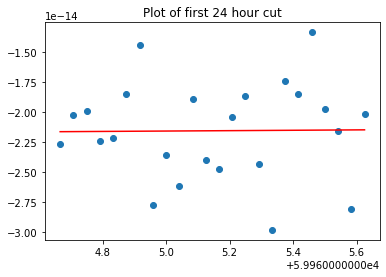

In [93]:
plt.scatter(day_cut['TimeStamp'],-1*day_cut['f0'])      ### plot data and get slope

m2,b2 = np.polyfit(day_cut['TimeStamp'],-1*day_cut['f0'], 1)

print(m2,b2)

plt.plot(np.array(day_cut['TimeStamp']), m2*np.array(day_cut['TimeStamp']) + b2,'r')
plt.title('Plot of first 24 hour cut')

In [94]:
F0_cfs_array1 = np.array(Zoom_in_CFS['f0'])

In [95]:
## Loop 24 hr

i = 0
steps_24 =[]
F0_cfs_array1 = np.array(Zoom_in_CFS['f0'])

for i in run1:
    
    m2,b2 = np.polyfit(Time_cfs_array[i:i+24],-1*F0_cfs_array1[i:i+24], 1)
    step_f0_24 = m2*(Time_cfs_array[i+23]) + b2  
    
    steps_24.append(step_f0_24)
    
    F0_cfs_array1[i:] += step_f0_24     # add step to all frequencies from this index on

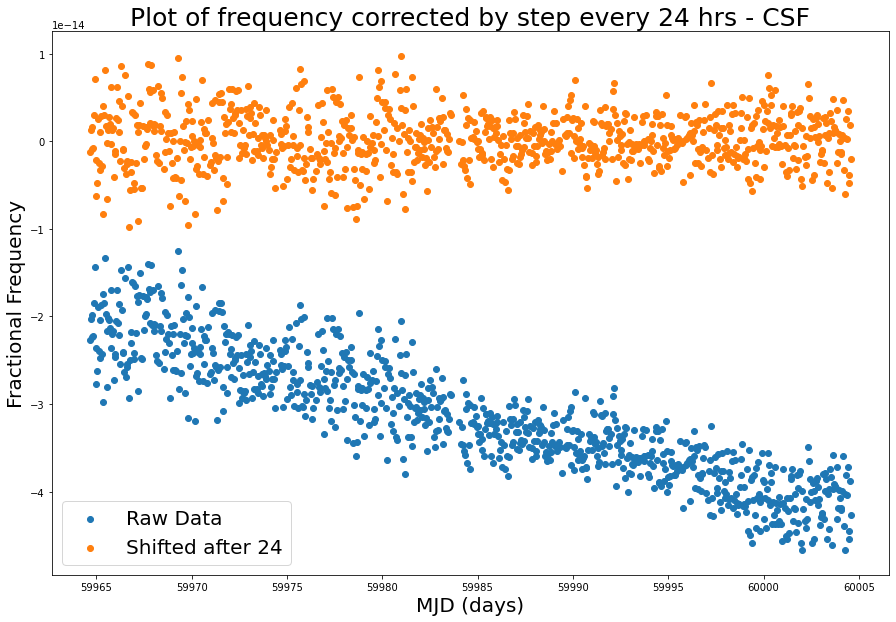

In [96]:
## Only 1 step possible atm as not 48 hours of continuos data

plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'],label='Raw Data')
plt.scatter(Time_cfs_array,-1*F0_cfs_array1,label='Shifted after 24')

plt.title('Plot of frequency corrected by step every 24 hrs - CSF',fontsize=25)
plt.xlabel('MJD (days)',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\Zoomed -in 24hr.png")

In [97]:
#steps_24

## 4.1 Calculate Overlapping Allan Deviation

In [98]:
t = np.logspace(0,6,100)  # tau values from 
y2 = F0_cfs_array1

r = 1/3600 

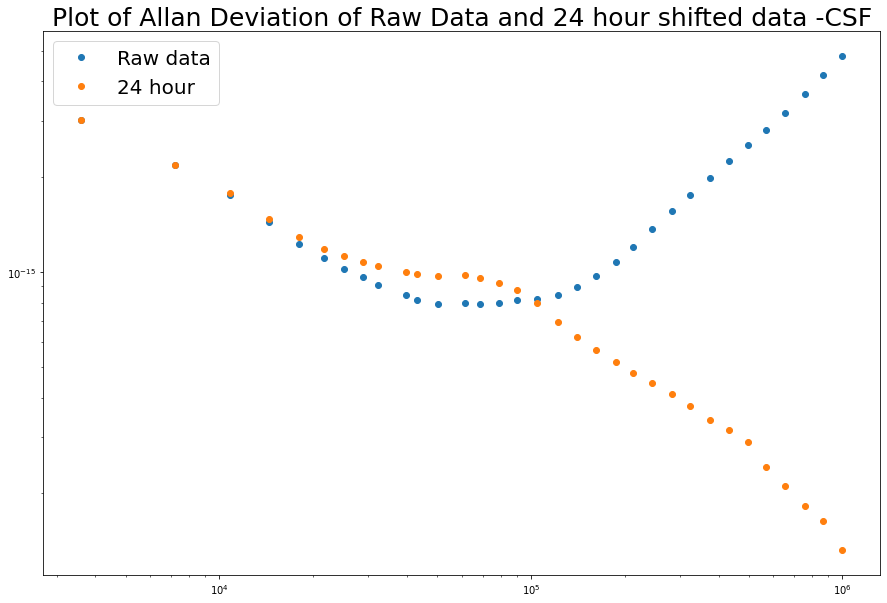

In [99]:
plt.figure(figsize=(15,10))
(t4, ad4, ade2, adn2) = at.oadev(y2, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t4, ad4,'o',label='24 hour') # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 24 hour shifted data -CSF',fontsize=25)
plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\AD zoomed in 24hr.png")

# 5. Steer in steps - 72 hrs - CFS

In [100]:
three_day_cut = Zoom_in_CFS[(Zoom_in_CFS['TimeStamp'])< (Time_cfs_array[0]+3)] 

3.516970012595656e-16 -2.111135100634979e-11


Text(0.5, 1.0, 'Plot of first 72 hour cut')

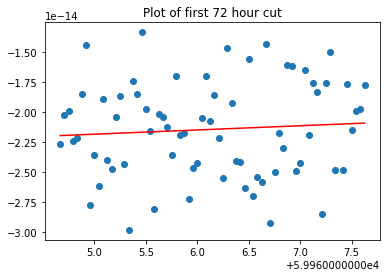

In [101]:
plt.scatter(three_day_cut['TimeStamp'],-1*three_day_cut['f0'])      ### plot data and get slope

m3,b3 = np.polyfit(three_day_cut['TimeStamp'],-1*three_day_cut['f0'], 1)

print(m3,b3)

plt.plot(np.array(three_day_cut['TimeStamp']), m3*np.array(three_day_cut['TimeStamp']) + b3,'r')
plt.title('Plot of first 72 hour cut')

In [102]:
F0_cfs_array2 = np.array(Zoom_in_CFS['f0'])

In [103]:
run2 = np.arange(0,830,72)

In [104]:
## Loop
i = 0
F0_cfs_array2 = np.array(Zoom_in_CFS['f0'])
steps_72 =[]

for i in run2:
    
    m3,b3 = np.polyfit(Time_cfs_array[i:i+72],-1*F0_cfs_array2[i:i+72], 1)
    step_f0_72 = m3*(Time_cfs_array[i+71]) + b3   
    
    steps_72.append(step_f0_72)
    
    F0_cfs_array2[i:] += step_f0_72     # add step to all frequencies from this index on

In [105]:
plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'],label='Raw Data')
plt.scatter(Time_cfs_array,-1*F0_cfs_array2,label='Shifted after 72')

plt.title('Plot of Fractional Frequency corrected by step every 72 hrs - CSF',fontsize=25)
plt.xlabel('MJD (days)',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\Zoomed -in 72hr.png")

## 5.1 Calculate Overlapping Allan Deviation

In [106]:
t = np.logspace(0,6,100)  # tau values from 
y3 = F0_cfs_array2

r = 1/3600 

In [107]:
plt.figure(figsize=(15,10))
(t5, ad5, ade5, dn3) = at.oadev(y3, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t5, ad5,'o',label='72 hour') # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 72 hour shifted data -CSF',fontsize=25)
plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\AD - zoomed in 72hr.png")

# 6. Steer in steps - 1 week - CFS

In [108]:
week_cut = Zoom_in_CFS[(Zoom_in_CFS['TimeStamp'])< (Time_cfs_array[0]+7)] 

In [109]:
plt.scatter(week_cut['TimeStamp'],-1*week_cut['f0'])      ### plot data and get slope

m4,b4 = np.polyfit(week_cut['TimeStamp'],-1*week_cut['f0'], 1)

print(m4,b4)

plt.plot(np.array(week_cut['TimeStamp']), m4*np.array(week_cut['TimeStamp']) + b4,'r')
plt.title('Plot of first week cut')

-4.300189972648109e-16 2.576534061708837e-11


Text(0.5, 1.0, 'Plot of first week cut')

In [110]:
F0_cfs_array3 = np.array(Zoom_in_CFS['f0'])

In [111]:
run3 = np.arange(0,750,168)

In [112]:
## Loop

i = 0
F0_cfs_array3 = np.array(Zoom_in_CFS['f0'])
steps_week = []

for i in run3:
    
    m4,b4 = np.polyfit(Time_cfs_array[i:i+168],-1*F0_cfs_array3[i:i+168], 1)
    step_f0_week = m4*(Time_cfs_array[i+167]) + b4  
    
    steps_week.append(step_f0_week)
    
    F0_cfs_array3[i:] += step_f0_week     # add step to all frequencies from this index on

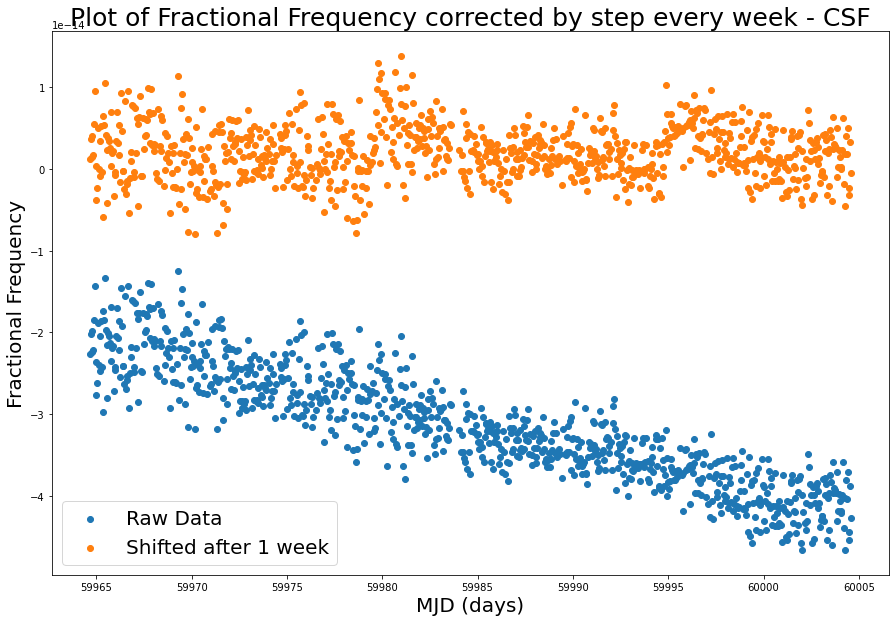

In [113]:
plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'],label='Raw Data')
plt.scatter(Time_cfs_array,-1*F0_cfs_array3,label='Shifted after 1 week')

plt.title('Plot of Fractional Frequency corrected by step every week - CSF',fontsize=25)
plt.xlabel('MJD (days)',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\Zoomed -in 1 week.png")

In [114]:
t = np.logspace(0,6,100)  # tau values from 
y4 = F0_cfs_array3

r = 1/3600 

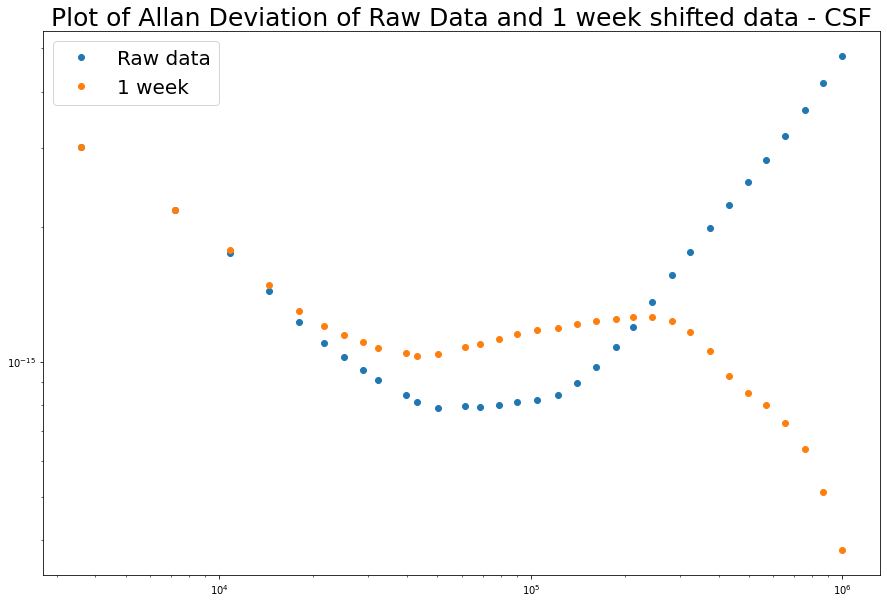

In [115]:
plt.figure(figsize=(15,10))
(t6, ad6, ade4, dn4) = at.oadev(y4, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t6, ad6,'o',label='1 week')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 1 week shifted data - CSF',fontsize=25)
plt.legend(fontsize=20)

plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\AD - zoomed in 1 week.png")

In [116]:
run48= np.arange(0,860,48)

In [117]:
## Loop

i = 0
F0_cfs_array_48 = np.array(Zoom_in_CFS['f0'])

for i in run48:
    
    m48,b48 = np.polyfit(Time_cfs_array[i:i+48],-1*F0_cfs_array_48[i:i+48], 1)
    step_f0_48 = m48*(Time_cfs_array[i+47]) + b48  
    
    F0_cfs_array_48[i:] += step_f0_48

In [118]:
plt.figure(figsize=(15,10))

plt.scatter(Zoom_in_CFS['TimeStamp'],-1*Zoom_in_CFS['f0'],label='Raw Data')
plt.scatter(Time_cfs_array,-1*F0_cfs_array_48,label='Shifted after 48 hrs')

plt.title('Plot of frequency corrected by small step every 48 hrs - Cfs',fontsize=20)
plt.legend(fontsize=20)

In [119]:
t = np.logspace(0,6,100)  # tau values from 
y48 = F0_cfs_array_48

r = 1/3600 

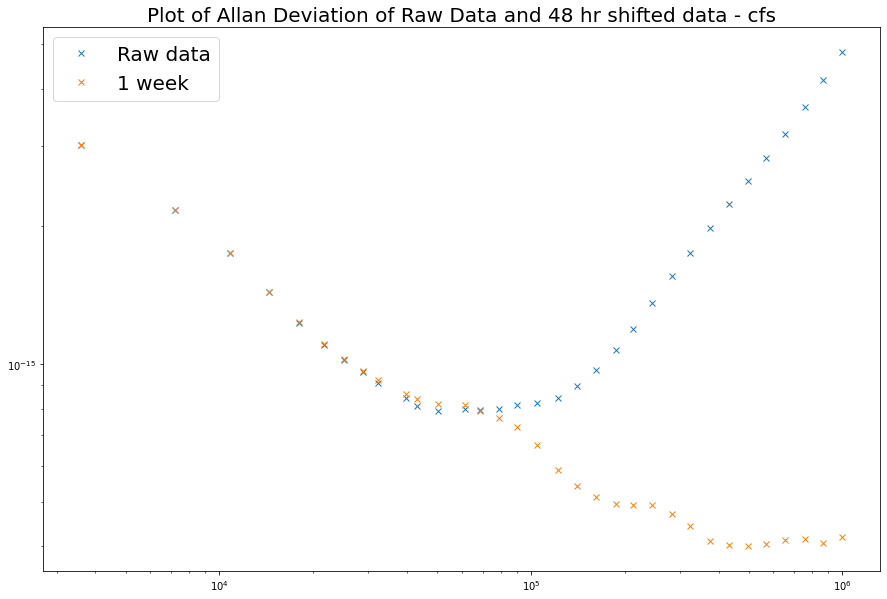

In [120]:
plt.figure(figsize=(15,10))
(t48, ad48, ade48, dn48) = at.oadev(y48, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t48, ad48,'x',label='1 week')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 48 hr shifted data - cfs',fontsize=20)
plt.legend(fontsize=20)

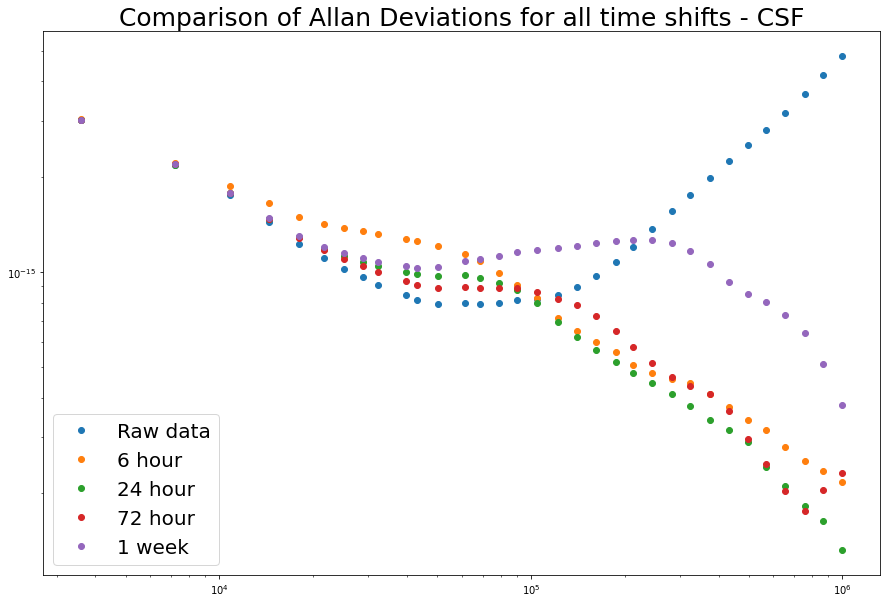

In [121]:
plt.figure(figsize=(15,10))

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t3, ad1,'o',label='6 hour')
plt.loglog(t4, ad4,'o',label='24 hour')
plt.loglog(t5, ad5,'o',label='72 hour')
plt.loglog(t6, ad6,'o',label='1 week')
#plt.loglog(t48, ad48,'o',label='48 hr') 

plt.title('Comparison of Allan Deviations for all time shifts - CSF',fontsize=25)

plt.legend(fontsize=20)
plt.savefig(r"C:\Users\bethx\Downloads\alpha_files\AD Comparison.png")

# 7. CFS data 6 hours - Full dataset

In [122]:
Truncated_Time_data

Bin Start UTC  Bin Start MJD Days  Bin Start Seconds  \
471   2023-01-20T15:00:00Z               59964              54000   
472   2023-01-20T16:00:00Z               59964              57600   
473   2023-01-20T17:00:00Z               59964              61200   
474   2023-01-20T18:00:00Z               59964              64800   
475   2023-01-20T19:00:00Z               59964              68400   
...                    ...                 ...                ...   
4081  2023-06-20T01:00:00Z               60115               3600   
4082  2023-06-20T02:00:00Z               60115               7200   
4083  2023-06-20T03:00:00Z               60115              10800   
4084  2023-06-20T04:00:00Z               60115              14400   
4085  2023-06-20T05:00:00Z               60115              18000   

      Bin End MJD Days  Bin End Seconds            f0       uA (f0)  \
471              59964            57599  2.269700e-14  1.726480e-14   
472              59964            61199  2.023900e-14  4.856220e-15   
473              59964            64799  1.988450e-14  4.465520e-15   
474              59964            68399  2.239550e-14  5.057780e-15   
475              59964            71999  2.218990e-14  4.416730e-15   
...                ...              ...           ...           ...   
4081             60115             7199  1.752220e-15  2.448350e-15   
4082             60115            10799 -2.606460e-15  2.826540e-15   
4083             60115            14399  4.593800e-16  2.748480e-15   
4084             60115            17999  1.561330e-15  2.825260e-15   
4085             60115            21599  3.973550e-16  4.962790e-15   

           uB (f0)  Freq Diff (LD-HD)    uA (LD-HD)  ...  uA (HD Sig)  \
471   1.227000e-15       6.642930e-14  2.829710e-14  ...     0.000011   
472   2.467000e-16       7.914020e-15  8.275400e-15  ...     0.000021   
473   2.075000e-16       3.016540e-15  7.815190e-15  ...     0.000015   
474   2.194000e-16       4.894430e-15  1.064660e-14  ...     0.000025   
475   2.000000e-16       4.185780e-17  8.494030e-15  ...     0.000025   
...            ...                ...           ...  ...          ...   
4081  2.055000e-16       2.425310e-15  4.930380e-15  ...     0.000054   
4082  2.003000e-16      -5.247510e-16  4.989550e-15  ...     0.000038   
4083  2.154000e-16       4.114240e-15  5.574640e-15  ...     0.000031   
4084  2.127000e-16       3.730080e-15  5.374690e-15  ...     0.000021   
4085  2.034000e-16       1.904380e-15  7.470780e-15  ...     0.000030   

      Mean LD Signal (Vs)  uA (LD Sig)  No. of HD Points  No. of LD Points  \
471              0.005062     0.000003                 5                18   
472              0.005086     0.000001                50               312   
473              0.005095     0.000001                55               315   
474              0.005112     0.000001                50               315   
475              0.005171     0.000002                55               311   
...                   ...          ...               ...               ...   
4081             0.007972     0.000003               155               941   
4082             0.007788     0.000003               160               934   
4083             0.007567     0.000002               155               942   
4084             0.007587     0.000001               155               942   
4085             0.007563     0.000002                53               303   

                                           HD Deadtimes  \
471                    [(54000, 57526), (57539, 57600)]   
472   [(57600, 57870), (57883, 58213), (58226, 58556...   
473   [(61200, 61304), (61317, 61647), (61660, 61991...   
474   [(64800, 65082), (65095, 65425), (65438, 65768...   
475   [(68400, 68516), (68529, 68860), (68873, 69203...   
...                                                 ...   
4081  [(3600, 3643), (3656, 3757), (3770, 3872), (38...   
4082  [(7200, 7204), (7217, 7319), (7332, 743

In [123]:
F0_cfs_array4 = np.array(Truncated_Time_data['f0'])     

In [124]:
Time_cfs_array1 = np.array(Truncated_Time_data['TimeStamp'])  

In [125]:
sixhr_cut_all = Truncated_Time_data[(Truncated_Time_data['TimeStamp'])< (Time_cfs_array1[0]+.25)] 

In [126]:
len(F0_cfs_array4)

1972

In [127]:
run4 = np.arange(0,1965,6)

In [128]:
## Loop

i = 0
F0_cfs_array4 = np.array(Truncated_Time_data['f0'])

for i in run4:
    
    m5,b5 = np.polyfit(Time_cfs_array1[i:i+6],-1*F0_cfs_array4[i:i+6], 1)
    step_f0_all = m5*(Time_cfs_array1[i+5]) + b5
    
    F0_cfs_array4[i:] += step_f0_all    # add step to all frequencies from this index on

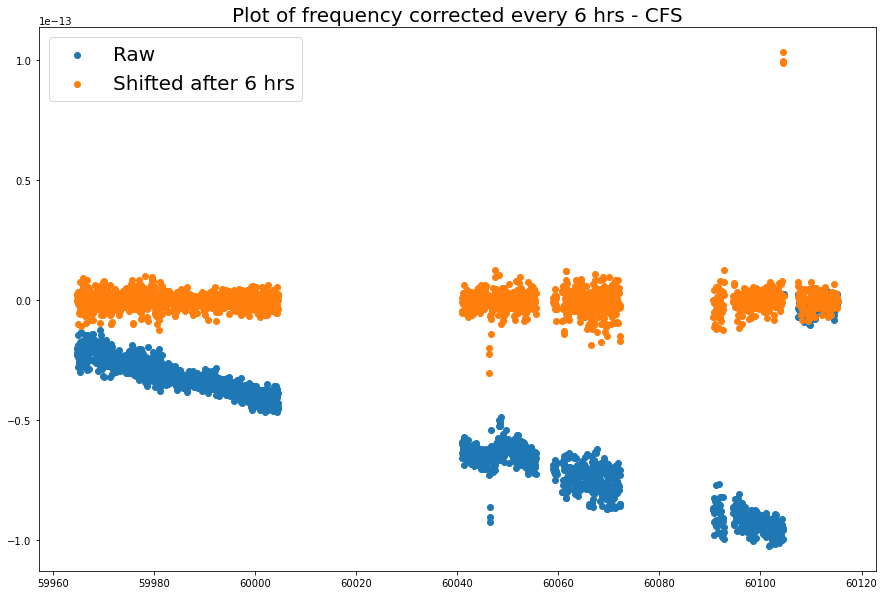

In [129]:
plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='Raw')
plt.scatter(Time_cfs_array1,F0_cfs_array4,label='Shifted after 6 hrs')

plt.title('Plot of frequency corrected every 6 hrs - CFS',fontsize=20)
plt.legend(fontsize=20)

## 7.1 Calculate Overlapping Allan Deviation

In [130]:
t = np.logspace(0,6,100)  # tau values from 
y5 = F0_cfs_array4

r = 1/3600 

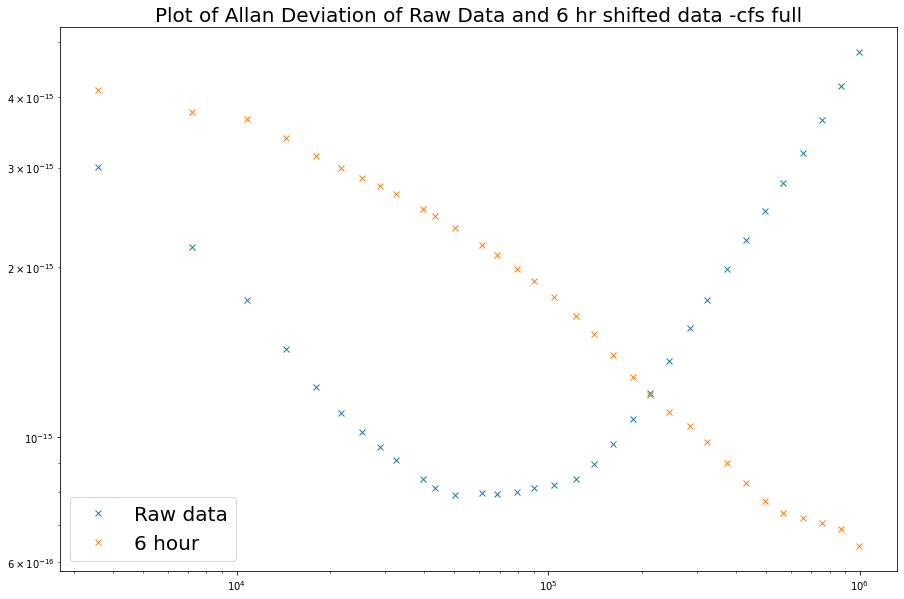

In [131]:
plt.figure(figsize=(15,10))
(t7, ad7, ade5, adn5) = at.oadev(y5, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t7, ad7,'x',label='6 hour')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 6 hr shifted data -cfs full',fontsize=20)
plt.legend(fontsize=20)

# 8 CFS data 24 hours - Full dataset

In [132]:
F0_cfs_array5 = np.array(Truncated_Time_data['f0'])    

In [133]:
day_cut_all = Truncated_Time_data[(Truncated_Time_data['TimeStamp'])< (Time_cfs_array1[0]+1)] 

In [134]:
run5 = np.arange(0,1950,24)

In [135]:
## Loop

i = 0
F0_cfs_array5 = np.array(Truncated_Time_data['f0'])  

for i in run5:
    
    m6,b6 = np.polyfit(Time_cfs_array1[i:i+24],-1*F0_cfs_array5[i:i+24], 1)
    step_day_all = m6*(Time_cfs_array1[i+23]) + b6
    
    #step_day_all = F0_cfs_array5[i]     # set step to frequency at time t=i
    #print(step_f0) 
    
    F0_cfs_array5[i:] += step_day_all    # add step to all frequencies from this index on

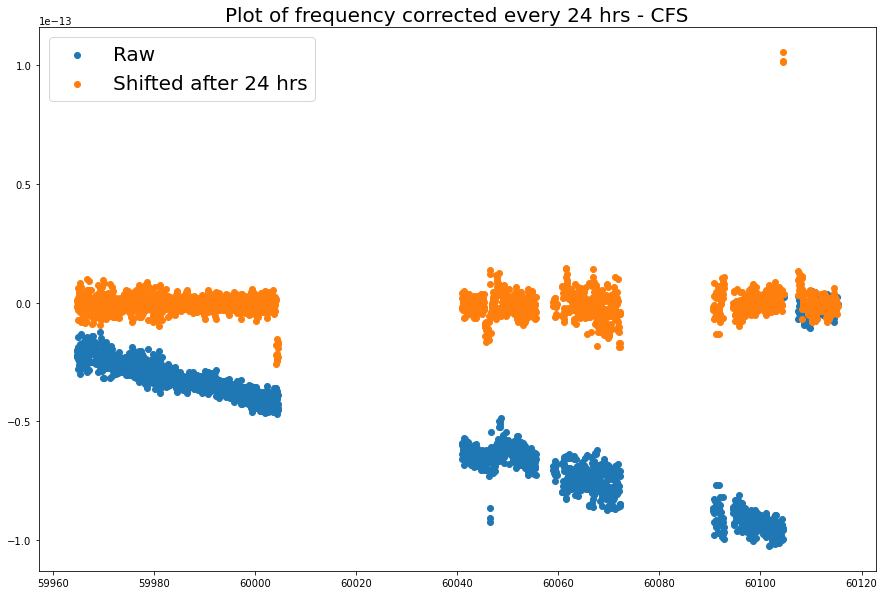

In [136]:
plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='Raw')
plt.scatter(Time_cfs_array1,F0_cfs_array5,label='Shifted after 24 hrs')

plt.title('Plot of frequency corrected every 24 hrs - CFS',fontsize=20)
plt.legend(fontsize=20)

## 8.1 Calculate Overlapping Allan Dev

In [137]:
t = np.logspace(0,6,100)  # tau values from 
y6 = F0_cfs_array5

r = 1/3600 

In [138]:
plt.figure(figsize=(15,10))
(t8, ad8, ade6, adn6) = at.oadev(y6, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t8, ad8,'x',label='24 hour')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 24 hr shifted data -cfs full',fontsize=20)
plt.legend(fontsize=20)

# 9 Steer 72 hours - CFS full

In [139]:
F0_cfs_array6 = np.array(Truncated_Time_data['f0'])   

In [140]:
run6 = np.arange(0,1901,72)

In [141]:
## Loop

i = 0
F0_cfs_array6 = np.array(Truncated_Time_data['f0'])   

for i in run6:
    
    m7,b7 = np.polyfit(Time_cfs_array1[i:i+72],-1*F0_cfs_array6[i:i+72], 1)
    step_3day_all = m7*(Time_cfs_array1[i+71]) + b7
    
    
    F0_cfs_array6[i:] += step_3day_all    # add step to all frequencies from this index on

In [142]:
plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='Raw')
plt.scatter(Time_cfs_array1,F0_cfs_array6,label='Shifted after 72 hrs')

plt.title('Plot of frequency corrected every 72 hrs - CFS',fontsize=20)
plt.legend(fontsize=20)

## 9.1 OAD 

In [143]:
t = np.logspace(0,6,100)  # tau values from 
y7 = F0_cfs_array6

r = 1/3600 

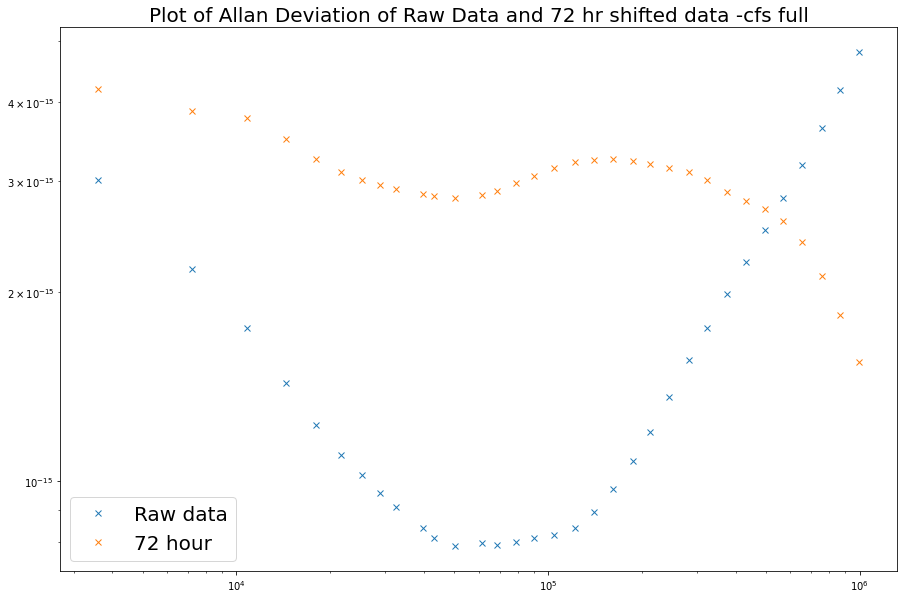

In [144]:
plt.figure(figsize=(15,10))
(t9, ad9, ade7, adn7) = at.oadev(y7, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t9, ad9,'x',label='72 hour')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 72 hr shifted data -cfs full',fontsize=20)
plt.legend(fontsize=20)

# 10. Steer after 1 week - CFS full

In [145]:
F0_cfs_array7 = np.array(Truncated_Time_data['f0'])   

In [146]:
run7 = np.arange(0,1830,168)

In [147]:
## Loop

i = 0 
F0_cfs_array7 = np.array(Truncated_Time_data['f0'])   

for i in run7:
    
    m8,b8 = np.polyfit(Time_cfs_array1[i:i+168],-1*F0_cfs_array7[i:i+168], 1)
    step_week_all = m8*(Time_cfs_array1[i+167]) + b8    
    
    F0_cfs_array7[i:] += step_week_all    # add step to all frequencies from this index on

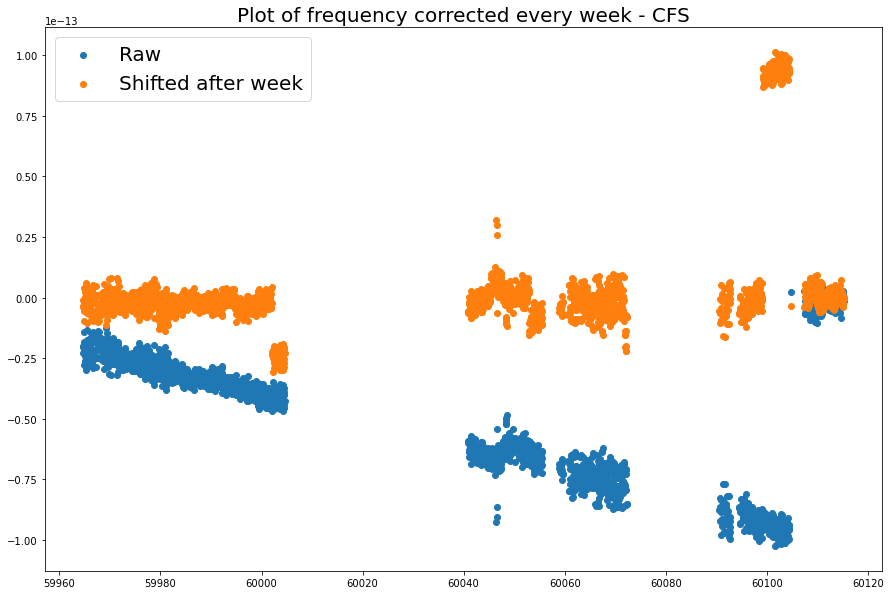

In [148]:
plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='Raw')
plt.scatter(Time_cfs_array1,F0_cfs_array7,label='Shifted after week')

plt.title('Plot of frequency corrected every week - CFS',fontsize=20)
plt.legend(fontsize=20)

## 10.1 OAD

In [149]:
t = np.logspace(0,6,100)  # tau values from 
y8 = F0_cfs_array7

r = 1/3600 

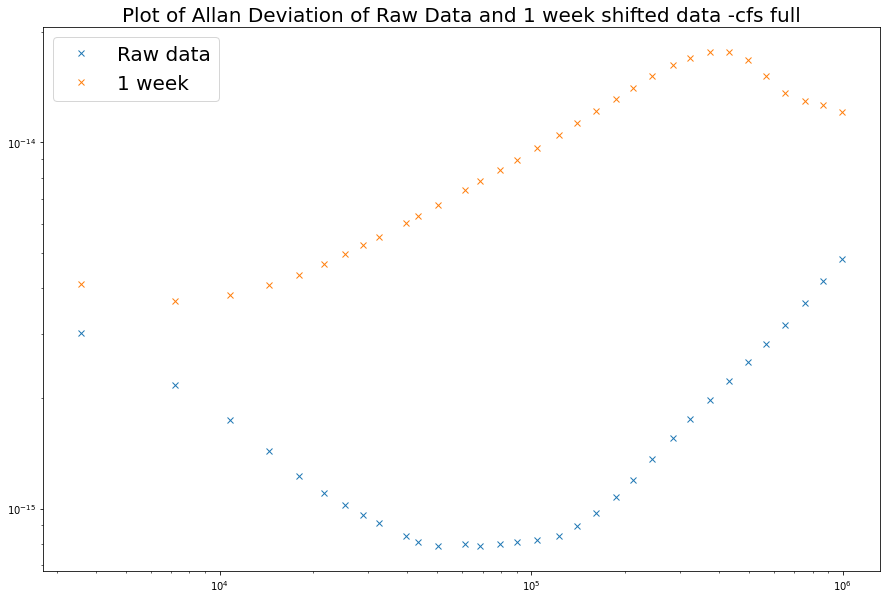

In [150]:
plt.figure(figsize=(15,10))
(t10, ad10, ade8, adn8) = at.oadev(y8, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t10, ad10,'x',label='1 week')     # Plot the results

plt.title('Plot of Allan Deviation of Raw Data and 1 week shifted data -cfs full',fontsize=20)
plt.legend(fontsize=20)

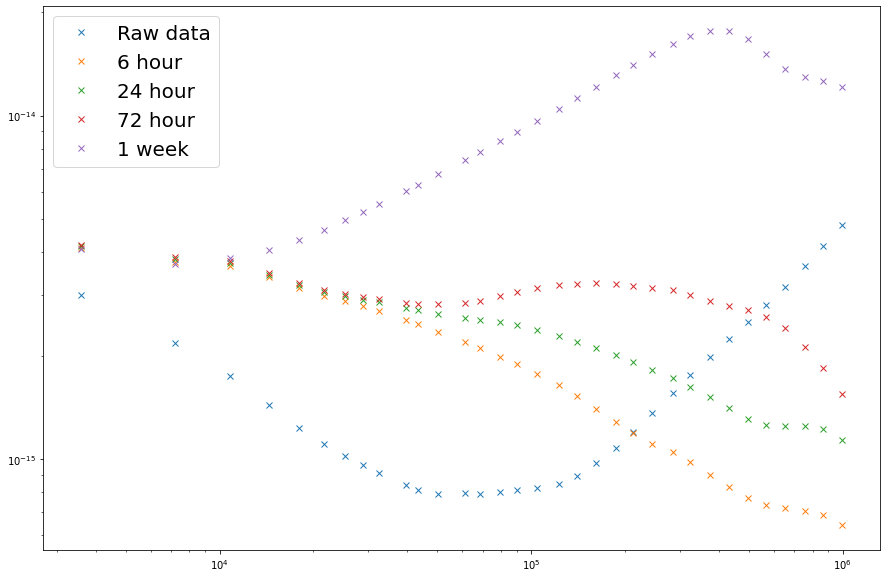

In [151]:
plt.figure(figsize=(15,10))

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t7, ad7,'x',label='6 hour')
plt.loglog(t8, ad8,'x',label='24 hour')
plt.loglog(t9, ad9,'x',label='72 hour')
plt.loglog(t10, ad10,'x',label='1 week') 

plt.legend(fontsize=20)

# Steer by threshold 

In [152]:
Truncated_Time_data['f0']

471     2.269700e-14
472     2.023900e-14
473     1.988450e-14
474     2.239550e-14
475     2.218990e-14
            ...     
4081    1.752220e-15
4082   -2.606460e-15
4083    4.593800e-16
4084    1.561330e-15
4085    3.973550e-16
Name: f0, Length: 1972, dtype: float64

In [153]:
f0_array_threshold = np.array(Truncated_Time_data['f0'])


In [154]:
len(f0_array_threshold)

1972

In [155]:
fcutoff = f0_array_threshold[100]

fcutoff

2.19787e-14

In [156]:
Range = np.arange(0,1966,1)
F0_new = []

In [157]:
f0_array_threshold = np.array(Truncated_Time_data['f0'])

for i in Range:
    
    m5,b5 = np.polyfit(Time_cfs_array1[i:i+6],-1*f0_array_threshold[i:i+6], 1)
    step_f0_th = m5*(Time_cfs_array1[i+5]) + b5  
    
    
    if f0_array_threshold[i] > fcutoff:
        f0_array_threshold[i:] += step_f0_th
        
    else :
        f0_array_threshold[i:] = f0_array_threshold[i:]

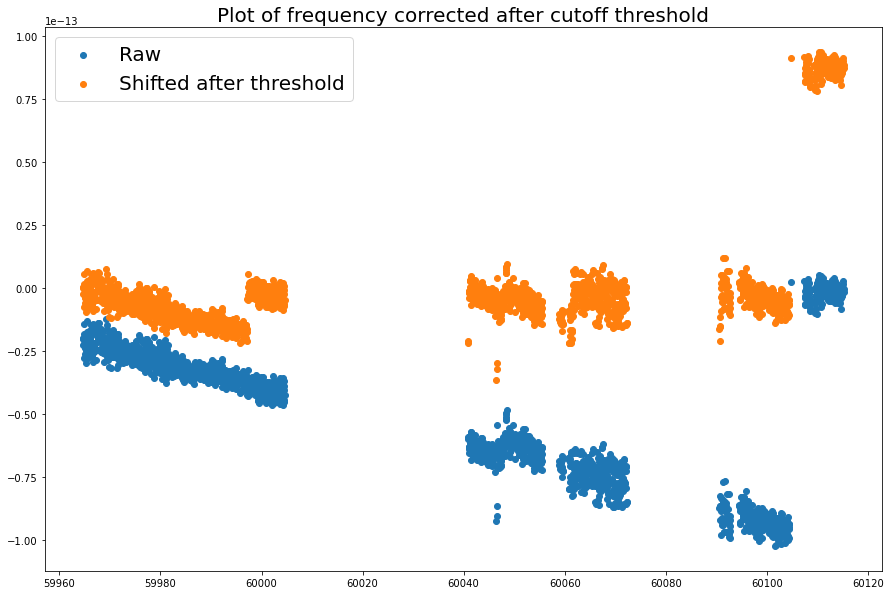

In [158]:
plt.figure(figsize=(15,10))

plt.scatter(Truncated_Time_data['TimeStamp'],-1*Truncated_Time_data['f0'],label='Raw')
plt.scatter(Time_cfs_array1,-1*f0_array_threshold,label='Shifted after threshold')

plt.title('Plot of frequency corrected after cutoff threshold',fontsize=20)
plt.legend(fontsize=20)

In [159]:
t = np.logspace(0,6,100)  # tau values from 
y9 = f0_array_threshold

r = 1/3600 

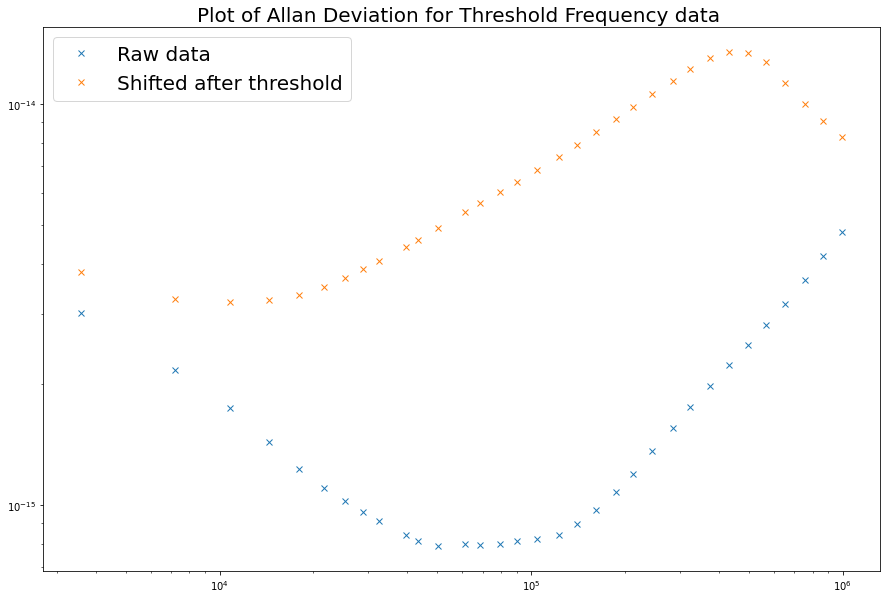

In [160]:
plt.figure(figsize=(15,10))
(t11, ad11, ade9, adn9) = at.oadev(y9, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'x',label='Raw data')
plt.loglog(t11, ad11,'x',label='Shifted after threshold')     # Plot the results

plt.title('Plot of Allan Deviation for Threshold Frequency data ',fontsize=20)
plt.legend(fontsize=20)

 # Steer GPS using CFS data

In [161]:
### cut gps data to same time frame as cfs data - from 59960 to 60010

In [162]:
#gps_combined['Epoch_mjd']           ### look at dataset

In [163]:
#gps_combined['diff_CLK(ns)']

In [164]:
Zoom_in_left_gps = gps_combined[(gps_combined['Epoch_mjd'])>59960]

#Zoom_in_left_gps

In [165]:
Zoom_in_gps = Zoom_in_left_gps[(Zoom_in_left_gps['Epoch_mjd'])<60010]

#Zoom_in_gps

len(np.array(Zoom_in_gps['Epoch_mjd']))

142273

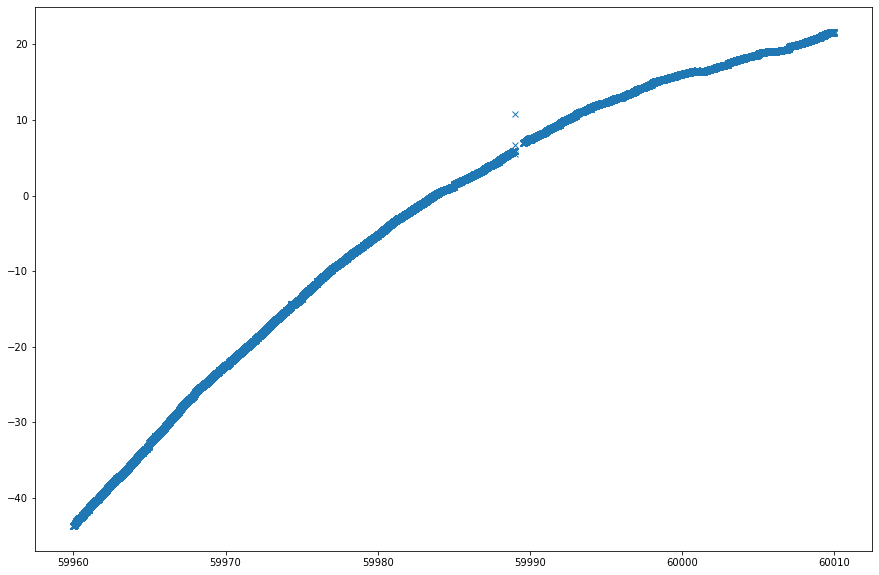

In [166]:
plt.figure(figsize=(15,10))

plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']),'x')

In [167]:
len(steps_24)

37

In [168]:
step_range_24 = np.arange(0,37,1)

In [169]:
### Try for 1 step after 24 hours before putting in loop

In [170]:
Time_gps_array = np.array(Zoom_in_gps['Epoch_mjd'])            ## define arrays for indexing
offset_array = np.array(Zoom_in_gps['diff_CLK(ns)'])*1e-9      ## convert to ns

In [171]:
def f(t):
    return steps_24[0]*t                                      ## function w first step size

In [172]:
cut1_gps = Zoom_in_gps[(Zoom_in_gps['Epoch_mjd'])>(Time_gps_array[0]+1)]         ## cut dataset to anything after 24 hrs

In [173]:
x = np.array(cut1_gps['Epoch_mjd'])                          ## evaluate function for all data after 24 hrs
y = f(x)

In [174]:
len(x)  ## length of cut data set for indexing

139393

In [175]:
142273-139393    ## get start index of new set

2880

In [176]:
offset_array[2880:]-y        

array([-4.00801009e-08, -4.00871009e-08, -4.00771009e-08, ...,
        2.28719515e-08,  2.28659515e-08,  2.28689515e-08])

In [177]:
offset_array[2880:]+y                        ## add function to original set

array([-4.26558991e-08, -4.26628991e-08, -4.26528991e-08, ...,
        2.02940485e-08,  2.02880485e-08,  2.02910485e-08])

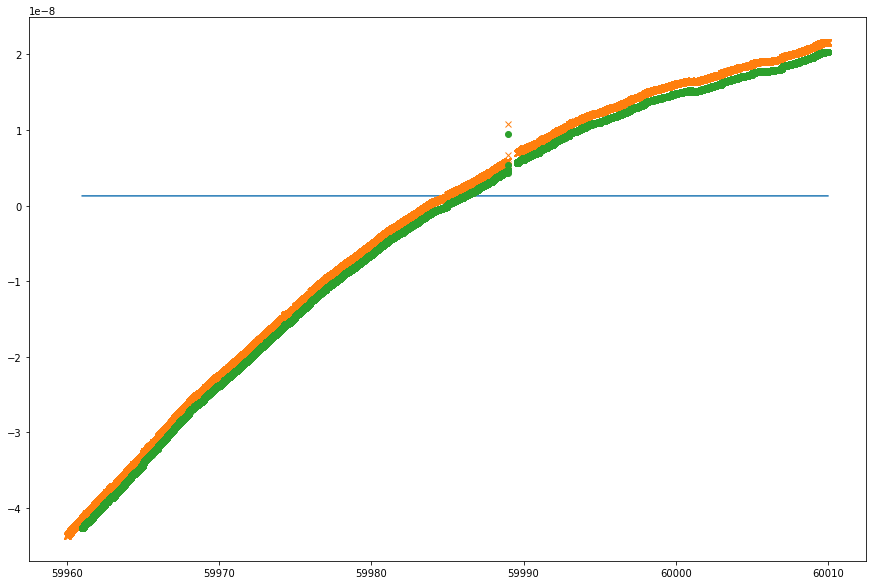

In [178]:
## Plot shifted set/ original set and linear function

plt.figure(figsize=(15,10))

plt.plot(x,-1*y)
plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9),'x')

plt.plot(x,(offset_array[2880:]+y),'o')

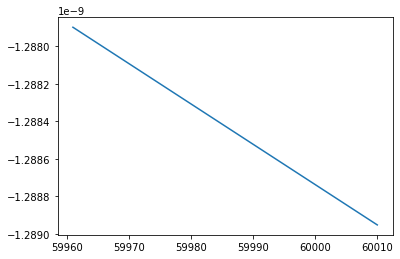

In [179]:
plt.plot(x,y)

In [180]:
Time_gps_array[-1]-Time_gps_array[0]

49.99930555555329

In [181]:
times_range = np.arange(0,50,1)

In [182]:
test_graphs = np.arange(0,20,5)

In [183]:
offset_array = np.array(Zoom_in_gps['diff_CLK(ns)'])*1e-9 

for n,i in zip(times_range,step_range_24) :


    def f(t) :
        return steps_24[i]*t

    #print(steps_24[i])

    cut_gps = Zoom_in_gps[(Zoom_in_gps['Epoch_mjd'])>(Time_gps_array[0]+n)]
    #print((Time_gps_array[0]+n))

    x = np.array(cut_gps['Epoch_mjd'])
    #print(x)
    y = f((x-x[0])*86400)
    
    if i == 0 :
        
        x_test = x
        y_test = y

    index = len(Time_gps_array) - len(cut_gps)

    offset_array[index:] -= y

i+=1       
n+=1

4.954401604243688e-14


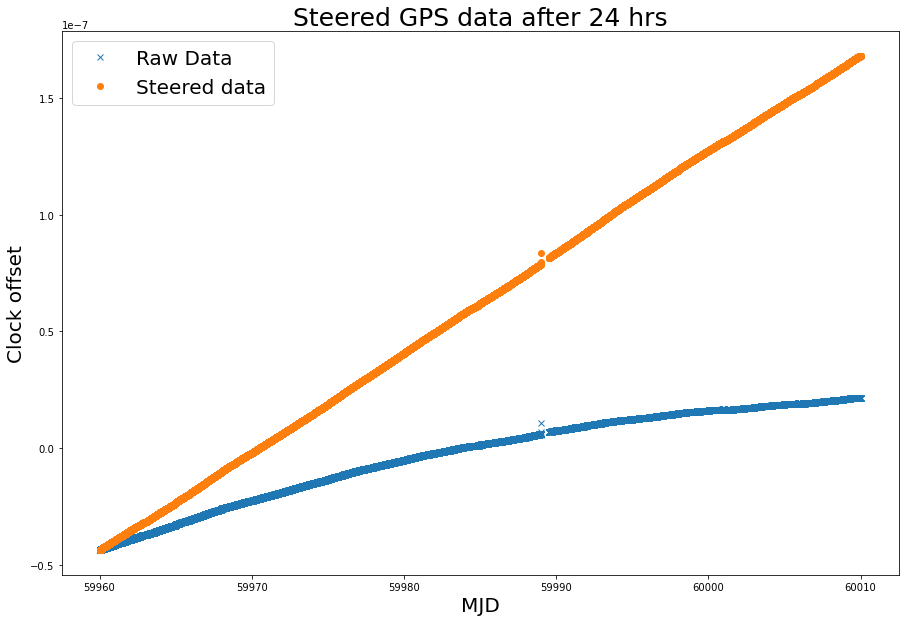

In [184]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9),'x',label='Raw Data')
plt.plot(Time_gps_array,offset_array,'o',label='Steered data')

m10,b10 = np.polyfit(Time_gps_array*86400,offset_array, 1)

print(m10)
#plt.plot(x_test,y_test)

plt.title('Steered GPS data after 24 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [185]:
t1 = np.logspace(0,8,100)  # tau values from 
y12 = offset_array

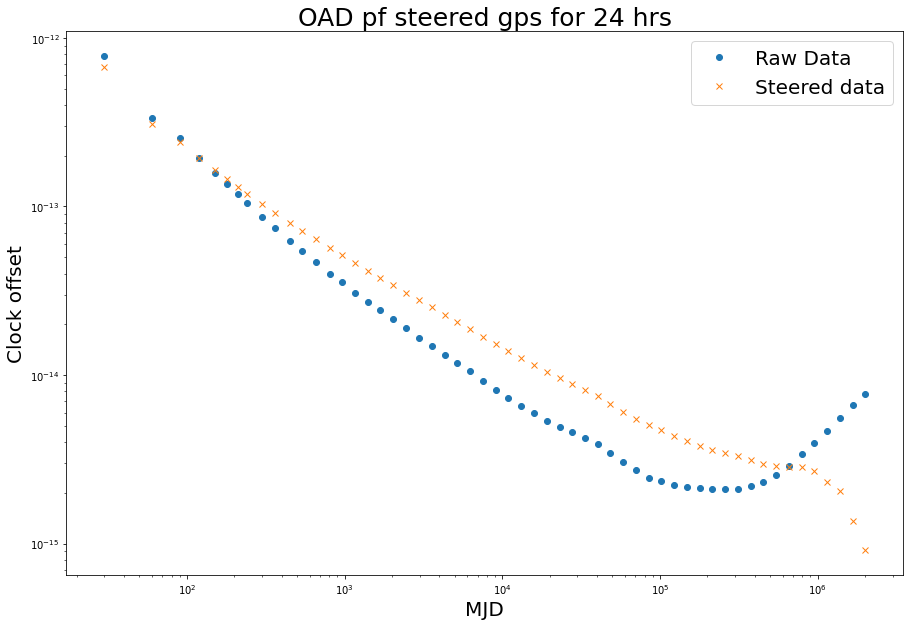

In [186]:
plt.figure(figsize=(15,10))

(t12, ad12, ade10, adn10) = at.oadev(y12, rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV
(t13, ad13, ade11, adn11) = at.oadev(np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9), rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV

plt.loglog(t13,ad13,'o',label='Raw Data')
plt.loglog(t12, ad12,'x',label='Steered data')  

plt.title('OAD pf steered gps for 24 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [187]:
### look at shifting w 6 hour data

In [188]:
times_range1 = np.arange(0,50,.25)

len(times_range1)

200

In [189]:
len(steps_6)

step_range_6 = np.arange(0,149,1)

In [190]:
offset_array1 = np.array(Zoom_in_gps['diff_CLK(ns)'])*1e-9 

for n,i in zip(times_range1,step_range_6) :


    def f(t) :
        return steps_6[i]*t

    #print(steps_6[i])

    cut_gps = Zoom_in_gps[(Zoom_in_gps['Epoch_mjd'])>(Time_gps_array[0]+n)]
    #print((Time_gps_array[0]+n))

    x = np.array(cut_gps['Epoch_mjd'])
    #print(x)
    y = f((x-x[0])*86400)

    index = len(Time_gps_array) - len(cut_gps)

    offset_array1[index:] -= y

i+=1       
n+=1

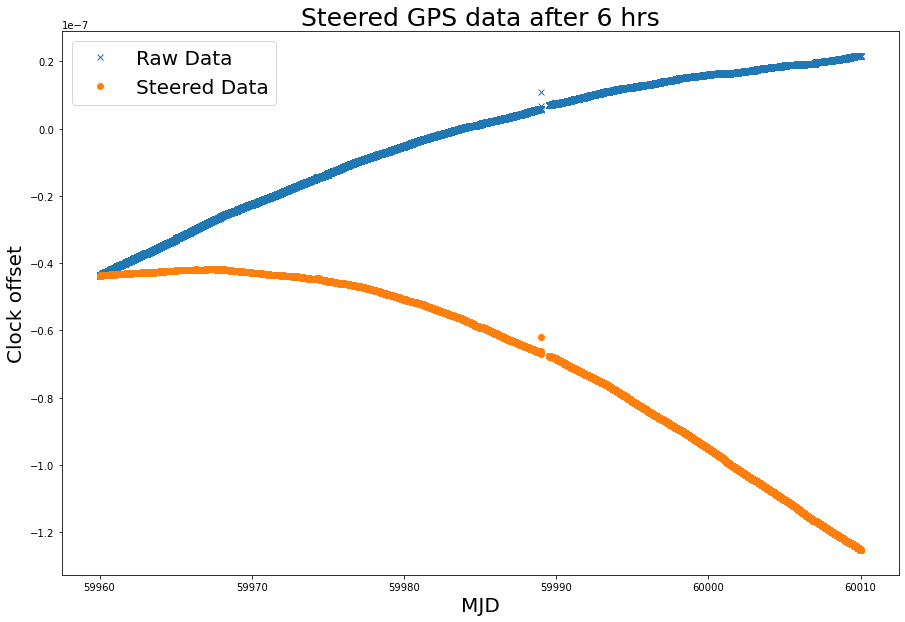

In [191]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9),'x',label='Raw Data')
plt.plot(Time_gps_array,offset_array1,'o',label='Steered Data')

plt.title('Steered GPS data after 6 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [192]:
t1 = np.logspace(0,8,100)  # tau values from 
y14 = offset_array1

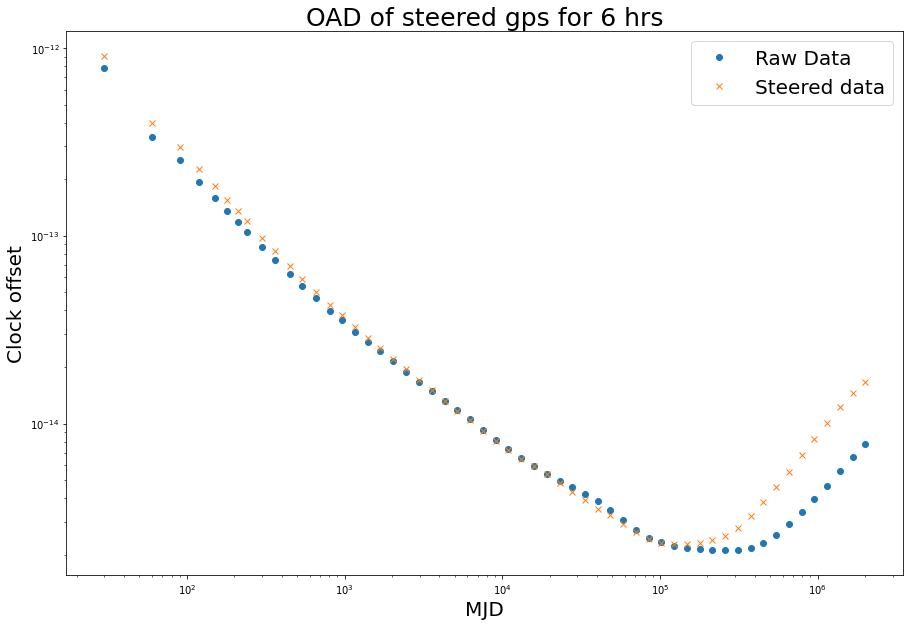

In [193]:
plt.figure(figsize=(15,10))

(t14, ad14, ade14, adn14) = at.oadev(y14, rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV
(t13, ad13, ade11, adn11) = at.oadev(np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9), rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV

plt.loglog(t13,ad13,'o',label='Raw Data')
plt.loglog(t14, ad14,'x',label='Steered data') 

plt.title('OAD of steered gps for 6 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [194]:
### 72 hours

In [195]:
times_range2 = np.arange(0,50,3)

In [196]:
len(steps_72)

step_range_72 = np.arange(0,12,1)

In [197]:
offset_array2 = np.array(Zoom_in_gps['diff_CLK(ns)'])*1e-9 

for n,i in zip(times_range2,step_range_72) :


    def f(t) :
        return steps_72[i]*t

    #print(steps_72[i])

    cut_gps = Zoom_in_gps[(Zoom_in_gps['Epoch_mjd'])>(Time_gps_array[0]+n)]
    #print((Time_gps_array[0]+n))

    x = np.array(cut_gps['Epoch_mjd'])
    #print(x)
    y = f((x-x[0])*86400)

    index = len(Time_gps_array) - len(cut_gps)

    offset_array2[index:] -= y

i+=1       
n+=1

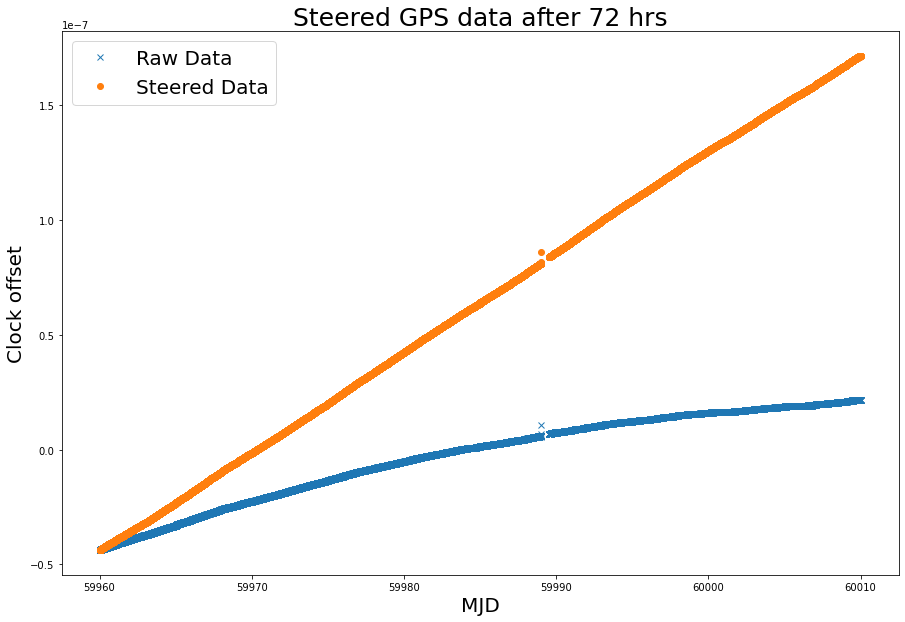

In [198]:
plt.figure(figsize=(15,10))

plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9),'x',label='Raw Data')
plt.plot(Time_gps_array,offset_array2,'o',label='Steered Data')

plt.title('Steered GPS data after 72 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [199]:
t1 = np.logspace(0,8,100)  # tau values from 
y15 = offset_array2

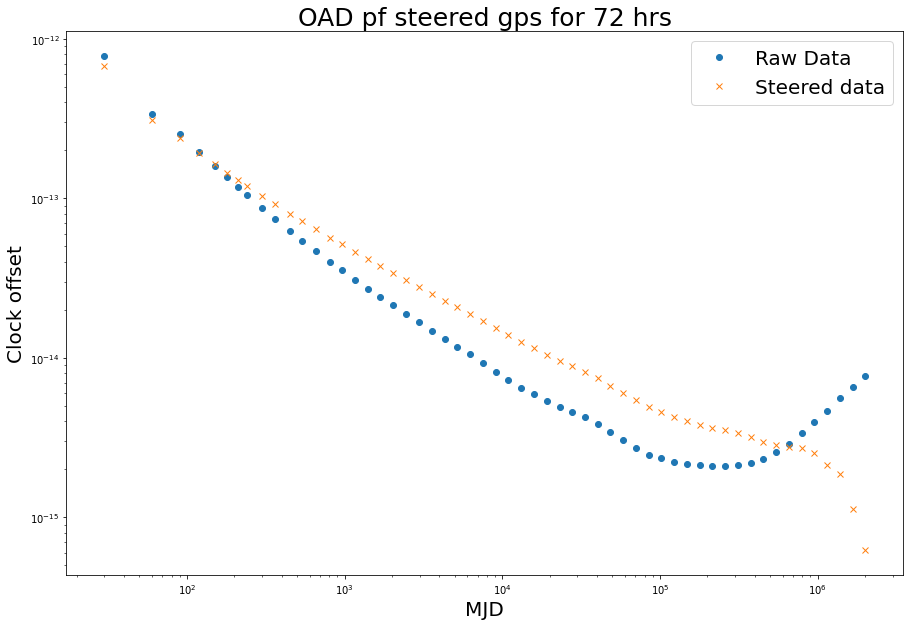

In [200]:
plt.figure(figsize=(15,10))


(t15, ad15, ade15, adn15) = at.oadev(y15, rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV

plt.loglog(t13,ad13,'o',label='Raw Data')
plt.loglog(t15, ad15,'x',label='Steered data')

plt.title('OAD pf steered gps for 72 hrs',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [201]:
### for 1 week

In [202]:
times_range3 = np.arange(0,50,7)

len(steps_week)

step_range_week = np.arange(0,5,1)

In [203]:
offset_array3 = np.array(Zoom_in_gps['diff_CLK(ns)'])*1e-9 

for n,i in zip(times_range3,step_range_week) :


    def f(t) :
        return steps_week[i]*t


    cut_gps = Zoom_in_gps[(Zoom_in_gps['Epoch_mjd'])>(Time_gps_array[0]+n)]

    x = np.array(cut_gps['Epoch_mjd'])
    y = f((x-x[0])*86400)

    index = len(Time_gps_array) - len(cut_gps)

    offset_array3[index:] -= y

i+=1       
n+=1

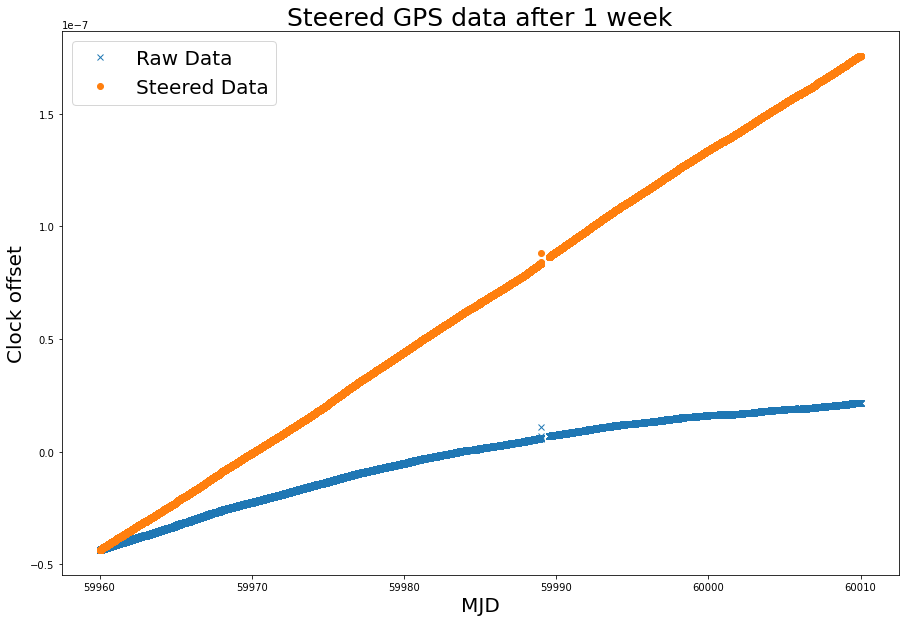

In [204]:
plt.figure(figsize=(15,10))

plt.plot(np.array(Zoom_in_gps['Epoch_mjd']),np.array(Zoom_in_gps['diff_CLK(ns)']*1e-9),'x',label='Raw Data')
plt.plot(Time_gps_array,offset_array3,'o',label='Steered Data')

plt.title('Steered GPS data after 1 week',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

In [205]:
t1 = np.logspace(0,8,100)  # tau values from 
y16 = offset_array3

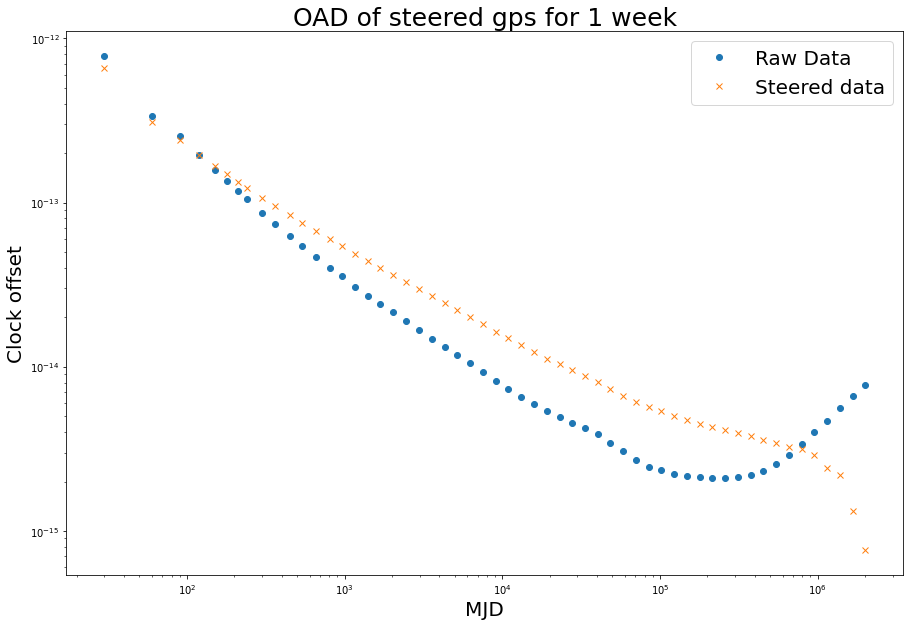

In [206]:
plt.figure(figsize=(15,10))


(t16, ad16, ade16, adn16) = at.oadev(y16, rate=1/30, data_type="phase",taus=t1)  # Compute the overlapping ADEV

plt.loglog(t13,ad13,'o',label='Raw Data')
plt.loglog(t16, ad16,'x',label='Steered data')     

plt.title('OAD of steered gps for 1 week',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Clock offset',fontsize=20)

plt.legend(fontsize=20)

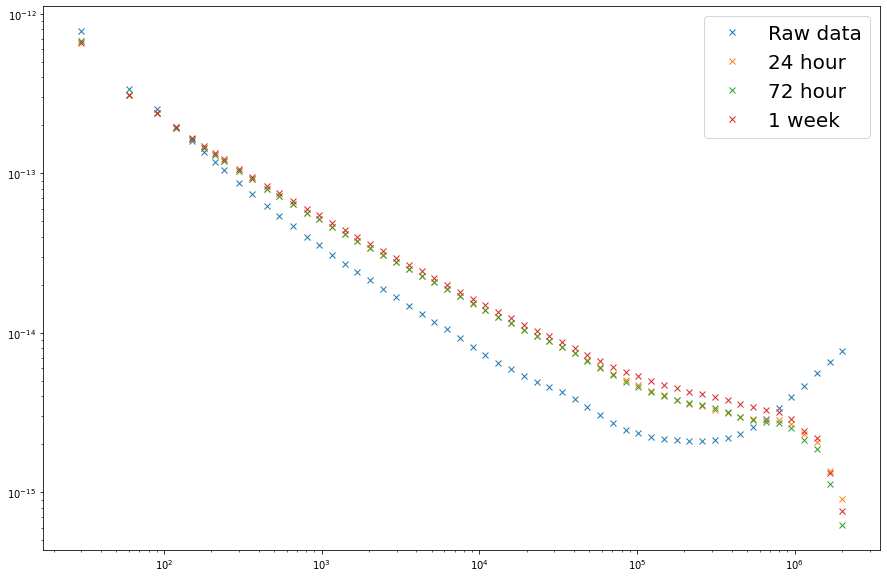

In [207]:
plt.figure(figsize=(15,10))

plt.loglog(t13, ad13,'x',label='Raw data')
#plt.loglog(t14, ad14,'x',label='6 hour')
plt.loglog(t12, ad12,'x',label='24 hour')
plt.loglog(t15, ad15,'x',label='72 hour')
plt.loglog(t16, ad16,'x',label='1 week') 

# plt.loglog(t2, ad,'x',label='Raw data -CSF')
# plt.loglog(t3, ad1,'x',label='6 hour-CSF')
# plt.loglog(t4, ad4,'x',label='24 hour -CSF')
# plt.loglog(t5, ad5,'x',label='72 hour- CSF')
# plt.loglog(t6, ad6,'x',label='1 week - CSF')
# plt.loglog(t48, ad48,'x',label='48 hr - CSF') 



plt.legend(fontsize=20)

# Smooth steer

In [208]:
F0_cfs_array = np.array(Zoom_in_CFS['f0'])
Time_csf_array = np.array(Zoom_in_CFS['TimeStamp']) ## convert to seconds

In [209]:
#Zoom_in_CFS

In [210]:
#Time_csf_array

In [211]:
run_cfs = np.arange(0,870,24)

In [212]:
times_range = np.arange(0,50,1)

In [213]:
offset_array_csf = np.array(Zoom_in_CFS['f0'])

In [214]:
md,b_f0 = np.polyfit(Time_csf_array[0:24],-1*offset_array_csf[0:24], 1)

print(md,b_f0)

1.6047860860015555e-16 -9.644679007648023e-12


In [215]:
def f_off(m,index) :
    return m*(Time_csf_array[index]) + b_f0

In [216]:
f_o = f_off(md,23)

In [217]:
m = - (f_o+1*md)/1

print(m)

2.1318467058111842e-14


In [218]:
def shift(t):
    return m*t

In [219]:
set_interest = Time_csf_array[24:48]

#set_interest

In [220]:
line1 = np.array(Time_csf_array[0:24]*md+b_f0)

In [221]:
line3 = np.array(shift(set_interest-set_interest[0]))

In [222]:
line2_y = line1+line3

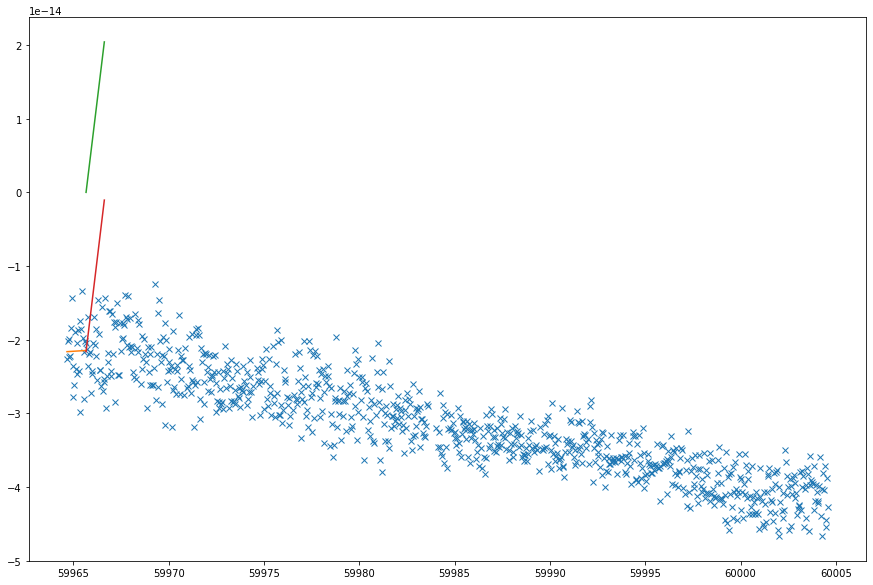

In [223]:
plt.figure(figsize=(15,10))

plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',)
plt.plot(np.array(Zoom_in_CFS['TimeStamp'][0:24]),md*np.array(Zoom_in_CFS['TimeStamp'][0:24])+b_f0,label='')
plt.plot(np.array(Zoom_in_CFS['TimeStamp'][24:48]), shift(set_interest-set_interest[0]))
plt.plot(np.array(Zoom_in_CFS['TimeStamp'][24:48]), line2_y)

## Smooth Steer 24 hrs

In [224]:
Time_csf_array = np.array(Zoom_in_CFS['TimeStamp'])
offset_array_csf = np.array(Zoom_in_CFS['f0'])

3.7956305330873464e-15 -2.276975642443514e-10


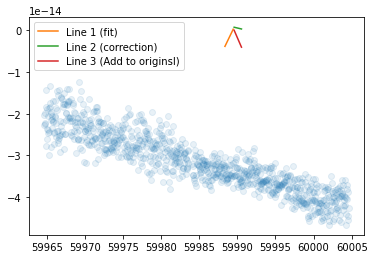

In [225]:
offset_array_csf = np.array(Zoom_in_CFS['f0'])

for i in run_cfs:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+24],-1*offset_array_csf[i:i+24], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+23))
    
    
    m = - (f_0+1*m_d)/1                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest1 = Time_csf_array[i+24:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest1-set_interest1[0]))
    #print(line3)
    
    plt.plot()
    
    index = len(Time_csf_array) - len(set_interest1)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf[index:] -= line3
    
        
    if i == 22*24:
        
        m0 = m_d
        b0 = b_f
        
        print(m0,b0)
        
        line1 = np.array(Time_csf_array[i+24:i+48]*m0 + b0)
        line1_plot = np.array(Time_csf_array[i:i+24]*m0 + b0)
#       line31 = shift(Time_csf_array[0:24]-Time_csf_array[0])
        line3_plot = shift(np.linspace(0, 1, 24))
        line2_plot = line3_plot + line1
        #print(line2)
        
        x_plot = Time_csf_array
        
        plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'o', alpha=0.1),
        plt.plot(Time_csf_array[i:i+24],line1_plot,label='Line 1 (fit)'),
        
        #plt.plot(np.array(Zoom_in_CFS['TimeStamp'][i+24:i+2*24]), shift((Time_csf_array[i+24:i+2*24]-Time_csf_array[0])),label='Line 3 (Add to originsl)'),
        plt.plot(Time_csf_array[i+24:i+2*24], line2_plot, label='Line 2 (correction)')
        #print(b_f)
        
        plt.plot(Time_csf_array[i+24:i+2*24],line3_plot,label='Line 3 (Add to originsl)')
        plt.legend()
        #plt.plot(np.array(Zoom_in_CFS['TimeStamp']),offset_array_csf)
    
    #1.8847801667013255e-14 -1.1302418406724159e-09

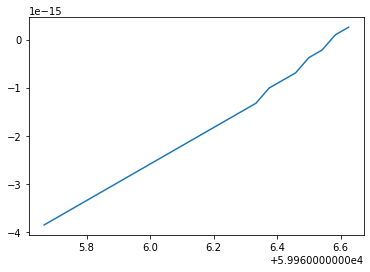

In [226]:
i=0

plt.plot(Time_csf_array[i+24:i+2*24], line1_plot, label='Line 2 (correction)')

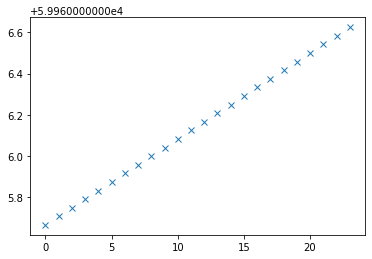

In [227]:
plt.plot(Time_csf_array[i+24:i+48], 'x')

In [228]:
Time_csf_array = np.array(Zoom_in_CFS['TimeStamp'])

In [229]:
line1 = np.array(Time_csf_array[24+24:24+48]*m0 + b0)
line31 = shift(np.linspace(0, 1, 24))
line2 = line31 + line1
#print(m0,b0)

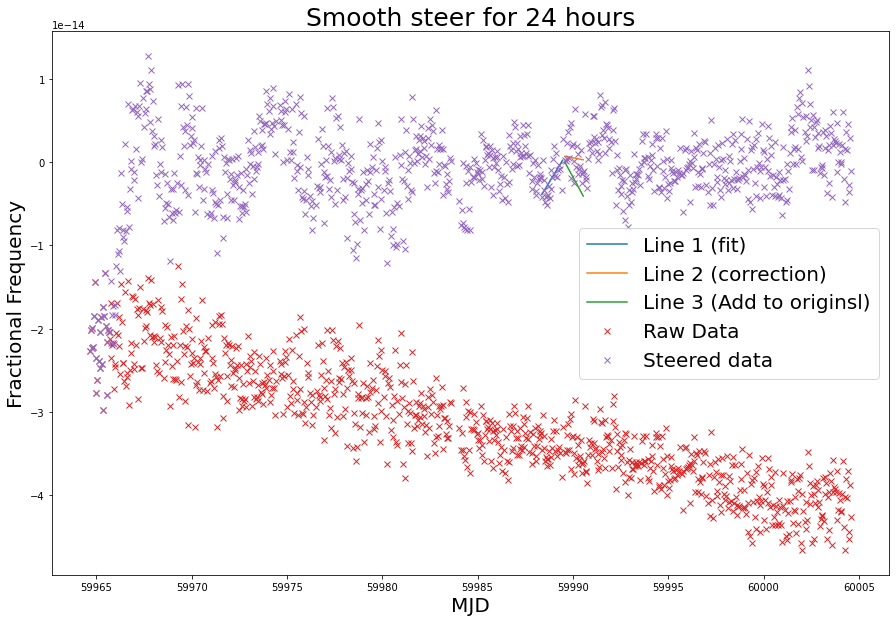

In [230]:
i=22*24
plt.figure(figsize=(15,10))

plt.plot(x_plot[i:i+24],line1_plot,label='Line 1 (fit)')
plt.plot(x_plot[i+24:i+2*24], line2_plot, label='Line 2 (correction)')
plt.plot(x_plot[i+24:i+2*24],line3_plot,label='Line 3 (Add to originsl)')

plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,-1*offset_array_csf,'x',label='Steered data')

# plt.plot(Time_csf_array[24:24+24],m0*Time_csf_array[24:24+24]+b0,label='Line 1 (fit)'),

 
# plt.plot(np.array(Zoom_in_CFS['TimeStamp'][24+24:24+2*24]), line2, label='Line 2 (correction)')
# plt.plot(Time_csf_array[24+24:24+2*24],line31[0:24],label='Line 3 (Add to originsl)')

plt.title('Smooth steer for 24 hours',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

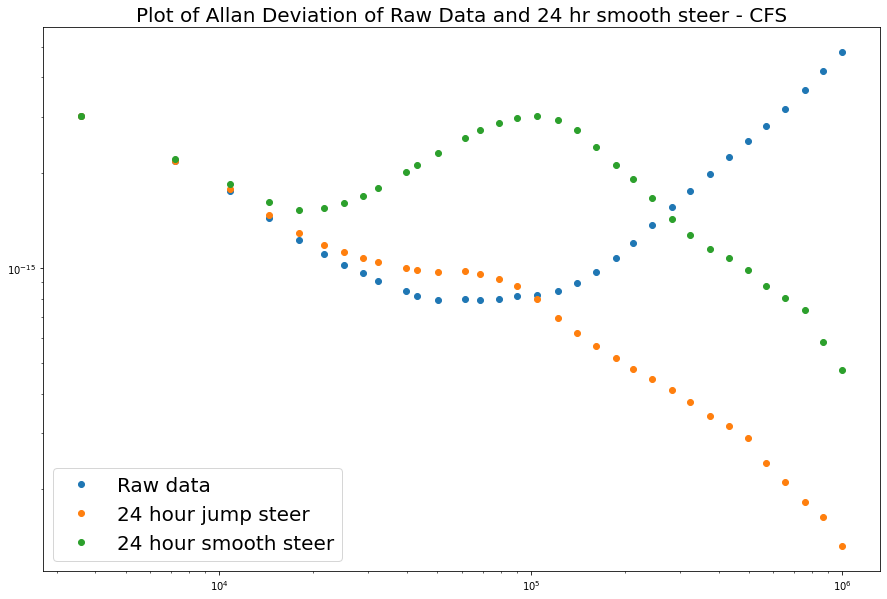

In [231]:
plt.figure(figsize=(15,10))

(t17, ad17, ade17, adn17) = at.oadev(offset_array_csf, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t4, ad4,'o',label='24 hour jump steer') 
plt.loglog(t17, ad17,'o',label='24 hour smooth steer')        # Plot the results


plt.title('Plot of Allan Deviation of Raw Data and 24 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

## Smooth Steer - 6 hrs

In [232]:
run_cfs1 = np.arange(0,894,6)

In [233]:
offset_array_csf1 = np.array(Zoom_in_CFS['f0'])

for i in run_cfs1:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+6],-1*offset_array_csf1[i:i+6], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+5))
    #print(m_d)
    
    m = - (f_0+.25*m_d)/.25                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest2 = Time_csf_array[i+6:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest2-set_interest2[0]))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest2)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf1[index:] -= line3
    
#     if i == 0 :
        
#         line1 = np.array(Time_csf_array[i:i+6]*m_d + b_f)
#         line3 = shift(Time_csf_array[i+6:i+2*6]-Time_csf_array[0])
#         line2 = line3 + line1
#         #print(line2)
        
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'o'),
#         plt.plot(Time_csf_array[i:i+6],m_d*Time_csf_array[i:i+6]+b_f),
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp'][i+6:i+2*6]), shift(Time_csf_array[i+6:i+2*6]-Time_csf_array[0])),
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp'][i+6:i+2*6]), line2)
#         #plt.plot(np.array(Zoom_in_CFS['TimeStamp']),offset_array_csf2)

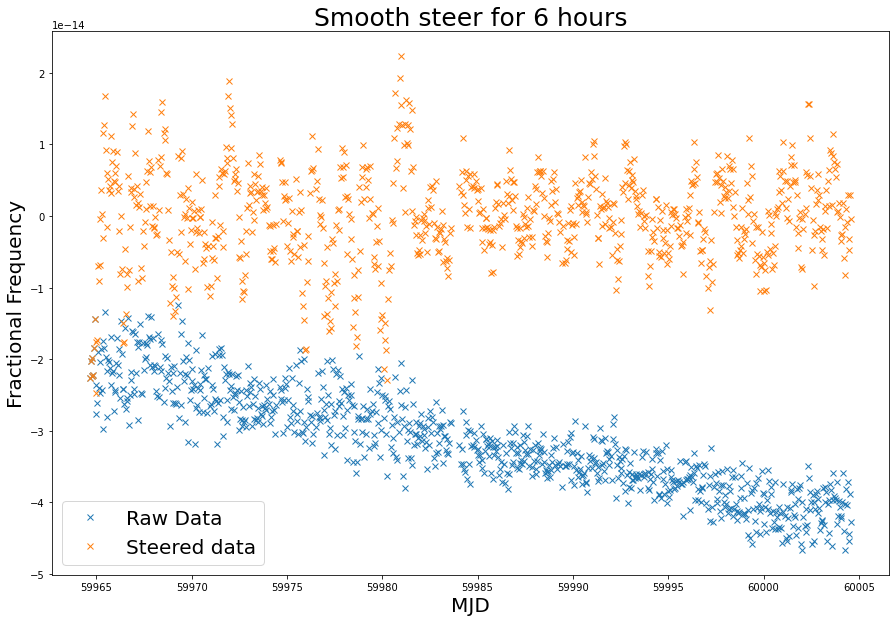

In [234]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,-1*offset_array_csf1,'x',label='Steered data')

plt.title('Smooth steer for 6 hours',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

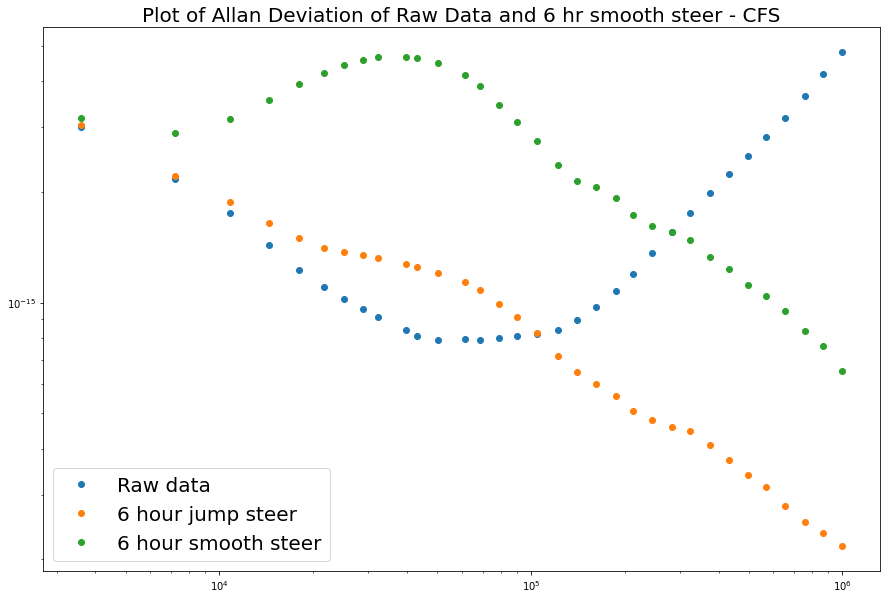

In [235]:
plt.figure(figsize=(15,10))

(t18, ad18, ade18, adn18) = at.oadev(offset_array_csf1, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t3, ad1,'o',label='6 hour jump steer') # Plot the results
plt.loglog(t18, ad18,'o',label='6 hour smooth steer')        # Plot the results


plt.title('Plot of Allan Deviation of Raw Data and 6 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

## Smooth Steer 72 hrs

In [236]:
run_cfs2 = np.arange(0,830,72)
offset_array_csf2 = np.array(Zoom_in_CFS['f0'])
Time_csf_array = np.array(Zoom_in_CFS['TimeStamp'])

In [237]:
offset_array_csf2 = np.array(Zoom_in_CFS['f0'])

for i in run_cfs2:
    #print(i)
    
    m_d1, b_f1 = np.polyfit(Time_csf_array[i:i+72],-1*offset_array_csf2[i:i+72], 1)    ## get md 
    #print(m_d,b_f1)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f1                                    ## function to find f_off
    
    f_0 = f_off(m_d1,(i+71))
    #print(m_d)
    
    m = - (f_0+3*m_d1)/3                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest3 = Time_csf_array[i+72:]
    #print(set_interest3-set_interest3[0])
    line3 = np.array(shift((set_interest3-set_interest3[0])))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest3)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf2[index:] -= line3
        
#     if i == 0 :
        
#         line1 = np.array(Time_csf_array[i:i+72]*m_d1 + b_f1)
#         line31 = shift(Time_csf_array[i+72:i+2*72]-Time_csf_array[0])
#         line2 = line31 + line1
#         #print(line2)
        
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'o'),
#         plt.plot(Time_csf_array[i:i+72],m_d1*Time_csf_array[i:i+72]+b_f1),
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp'][i+72:i+2*72]), shift(Time_csf_array[i+72:i+2*72]-Time_csf_array[0])),
#         plt.plot(np.array(Zoom_in_CFS['TimeStamp'][i+72:i+2*72]), line2)
#         #plt.plot(np.array(Zoom_in_CFS['TimeStamp']),offset_array_csf2)

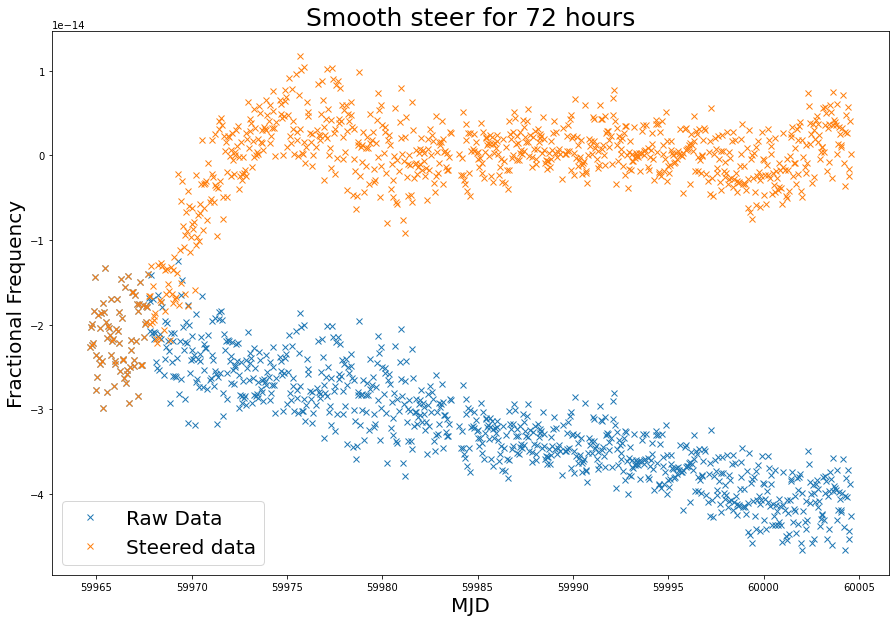

In [238]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,-1*offset_array_csf2,'x',label='Steered data')

plt.title('Smooth steer for 72 hours',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

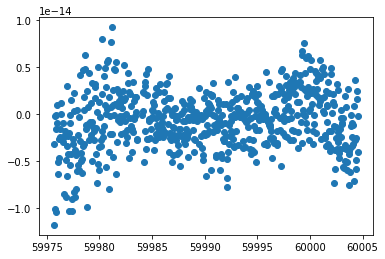

In [239]:
plt.plot(Time_csf_array[250:],offset_array_csf2[250:],'o')

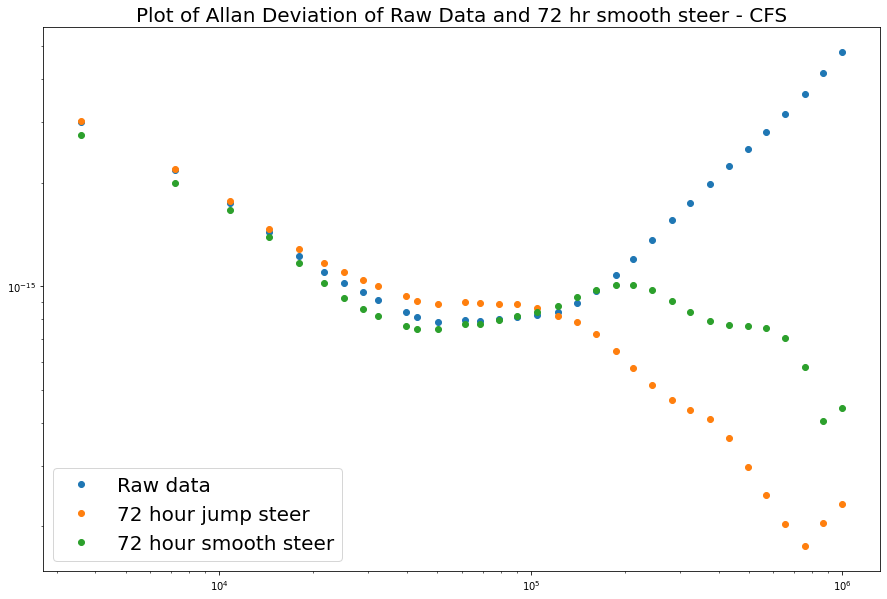

In [240]:
plt.figure(figsize=(15,10))

(t19, ad19, ade19, adn19) = at.oadev(offset_array_csf2[250:], rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t5, ad5,'o',label='72 hour jump steer') # Plot the results
plt.loglog(t19, ad19,'o',label='72 hour smooth steer')        # Plot the results


plt.title('Plot of Allan Deviation of Raw Data and 72 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

## Smooth Steer 1 week

In [241]:
run_cfs3 = np.arange(0,840,168)
offset_array_csf3 = np.array(Zoom_in_CFS['f0'])

In [242]:
offset_array_csf3 = np.array(Zoom_in_CFS['f0'])

for i in run_cfs3:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+168],-1*offset_array_csf3[i:i+168], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+167))
    
    
    m = - (f_0+7*m_d)/7                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest4 = Time_csf_array[i+168:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest4-set_interest4[0]))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest4)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf3[index:] -= line3

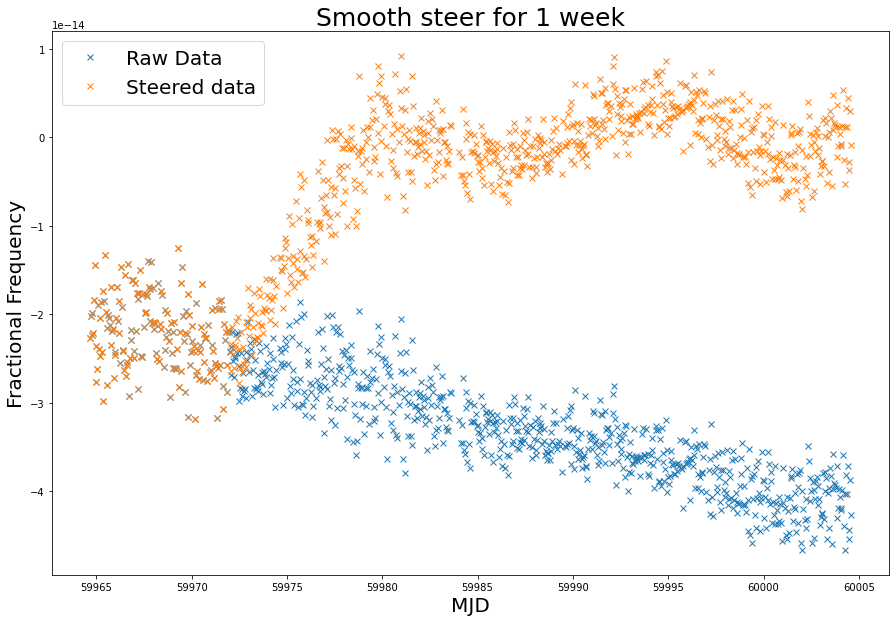

In [243]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,-1*offset_array_csf3,'x',label='Steered data')

plt.title('Smooth steer for 1 week',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

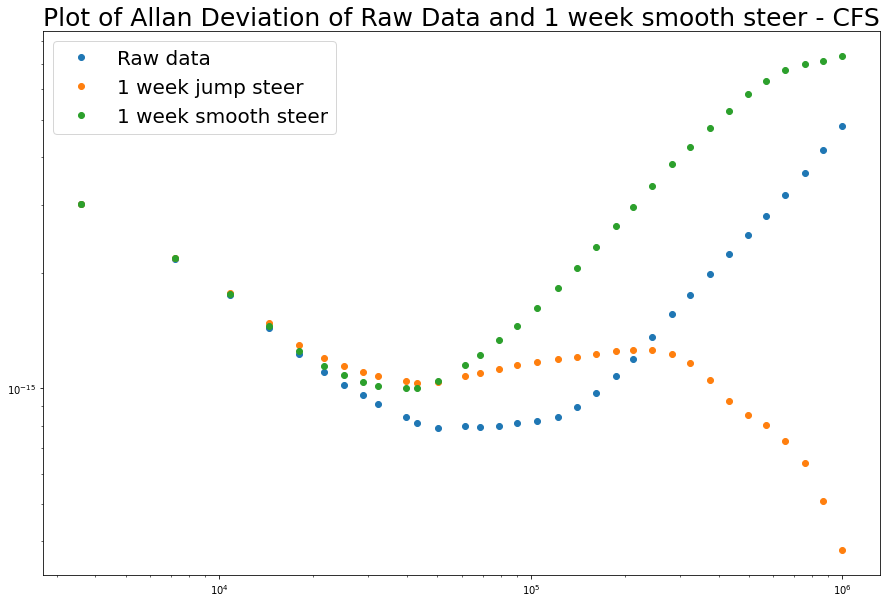

In [244]:
plt.figure(figsize=(15,10))

(t20, ad20, ade20, adn20) = at.oadev(offset_array_csf3, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t6, ad6,'o',label='1 week jump steer') # Plot the results
plt.loglog(t20, ad20,'o',label='1 week smooth steer')        # Plot the results


plt.title('Plot of Allan Deviation of Raw Data and 1 week smooth steer - CFS',fontsize=25)
plt.legend(fontsize=20)

In [245]:
## Plot all and compare

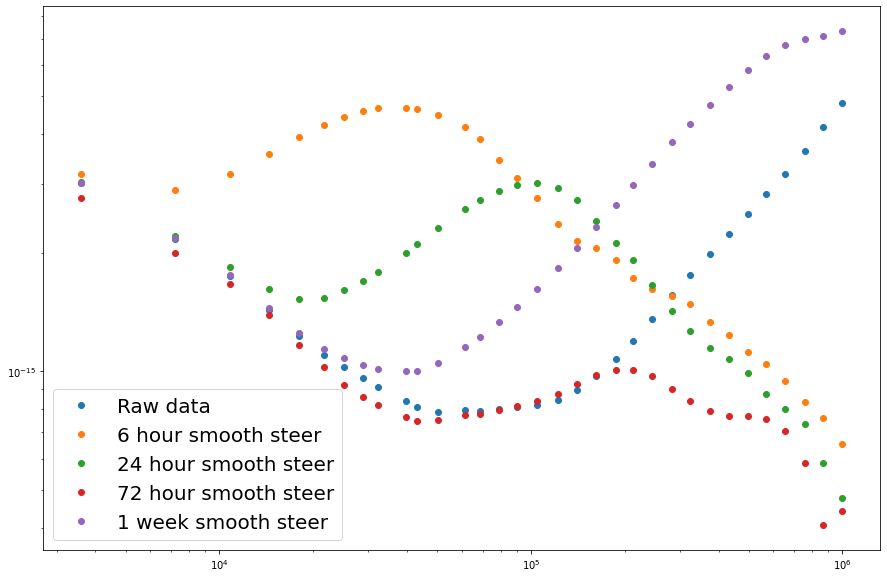

In [246]:
plt.figure(figsize=(15,10))

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t18, ad18,'o',label='6 hour smooth steer')
plt.loglog(t17, ad17,'o',label='24 hour smooth steer') 
plt.loglog(t19, ad19,'o',label='72 hour smooth steer')
plt.loglog(t20, ad20,'o',label='1 week smooth steer') 

plt.legend(fontsize=20)

## Get rid of 'humps'

In [247]:
Time_csf_Array = np.array(Zoom_in_CFS['TimeStamp'])
F0_csf_Array = np.array(Zoom_in_CFS['f0'])

-5.455965475194713e-16 3.2695983248720475e-11


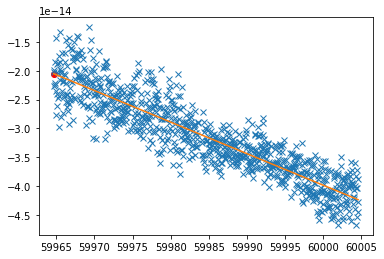

In [248]:
plt.plot(Time_csf_Array,-1*F0_csf_Array,'x',label='Raw Data')

m_fit,b_fit = np.polyfit(Time_csf_Array,-1*F0_csf_Array, 1)
print(m_fit,b_fit)

fit_line = np.array(m_fit*Time_csf_Array+b_fit)

plt.plot(Time_csf_Array,m_fit*Time_csf_Array+b_fit)
plt.scatter(Time_csf_Array[0],fit_line[0],color='r')

In [249]:
F0_csf_Array_shifted = F0_csf_Array + fit_line[0]

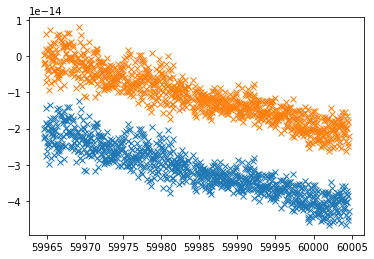

In [250]:
plt.plot(Time_csf_Array,-1*F0_csf_Array,'x',label='Raw Data')
plt.plot(Time_csf_Array,-1*F0_csf_Array_shifted,'x')

In [251]:
offset_array_csf4 = F0_csf_Array_shifted

for i in run_cfs:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+24],-1*offset_array_csf4[i:i+24], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+23))
    
    
    m = - (f_0+1*m_d)/1                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest1 = Time_csf_array[i+24:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest1-set_interest1[0]))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest1)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf4[index:] -= line3

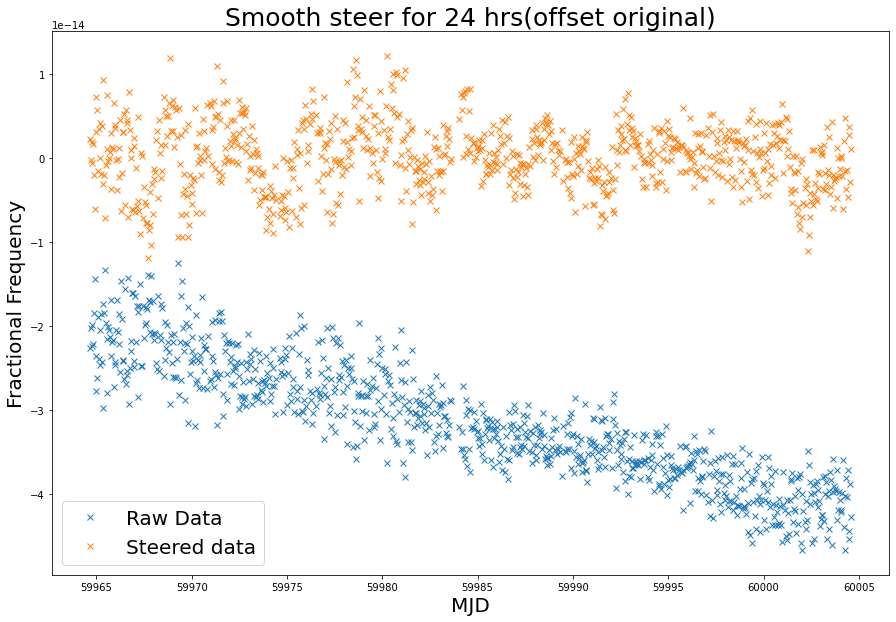

In [252]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,offset_array_csf4,'x',label='Steered data')

plt.title('Smooth steer for 24 hrs(offset original)',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

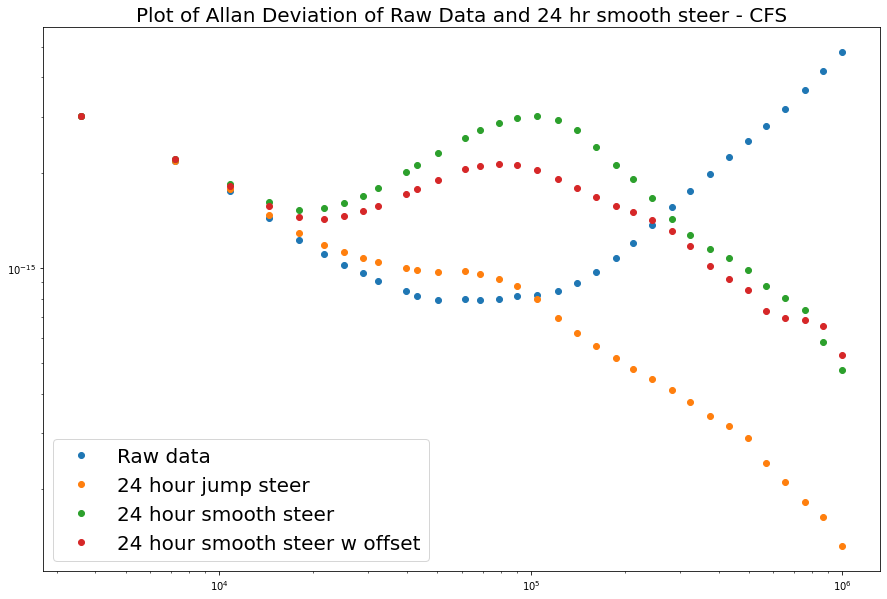

In [253]:
plt.figure(figsize=(15,10))

(t21, ad21, ade21, adn21) = at.oadev(offset_array_csf4, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t4, ad4,'o',label='24 hour jump steer') 
plt.loglog(t17, ad17,'o',label='24 hour smooth steer')  
plt.loglog(t21, ad21,'o',label='24 hour smooth steer w offset') # Plot the results


plt.title('Plot of Allan Deviation of Raw Data and 24 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

In [254]:
F0_csf_Array_shifted = F0_csf_Array + fit_line[0]

In [255]:
offset_array_csf5 = F0_csf_Array_shifted

for i in run_cfs1:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+6],-1*offset_array_csf5[i:i+6], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+5))
    #print(m_d)
    
    m = - (f_0+.25*m_d)/.25                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest2 = Time_csf_array[i+6:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest2-set_interest2[0]))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest2)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf5[index:] -= line3

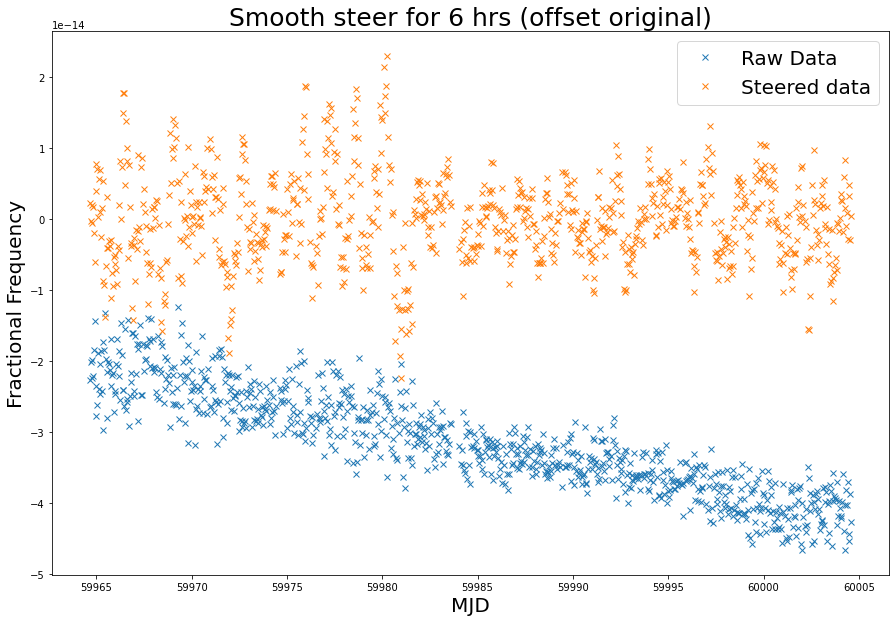

In [256]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,offset_array_csf5,'x',label='Steered data')

plt.title('Smooth steer for 6 hrs (offset original)',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

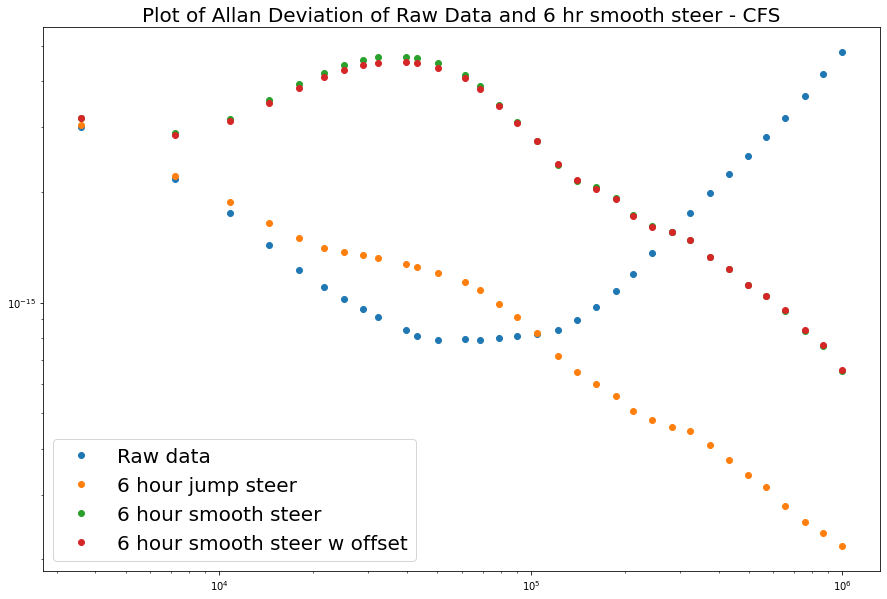

In [257]:
plt.figure(figsize=(15,10))

(t22, ad22, ade22, adn22) = at.oadev(offset_array_csf5, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t3, ad1,'o',label='6 hour jump steer') # Plot the results
plt.loglog(t18, ad18,'o',label='6 hour smooth steer')        # Plot the results
plt.loglog(t22, ad22,'o',label='6 hour smooth steer w offset') 

plt.title('Plot of Allan Deviation of Raw Data and 6 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

In [258]:
F0_csf_Array_shifted = F0_csf_Array + fit_line[0]

In [259]:
offset_array_csf6 = F0_csf_Array_shifted

for i in run_cfs2:
    #print(i)
    
    m_d1, b_f1 = np.polyfit(Time_csf_array[i:i+72],-1*offset_array_csf6[i:i+72], 1)    ## get md 
    #print(m_d,b_f1)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f1                                    ## function to find f_off
    
    f_0 = f_off(m_d1,(i+71))
    #print(m_d)
    
    m = - (f_0+3*m_d1)/3                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest3 = Time_csf_array[i+72:]
    #print(set_interest3-set_interest3[0])
    line3 = np.array(shift((set_interest3-set_interest3[0])))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest3)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf6[index:] -= line3

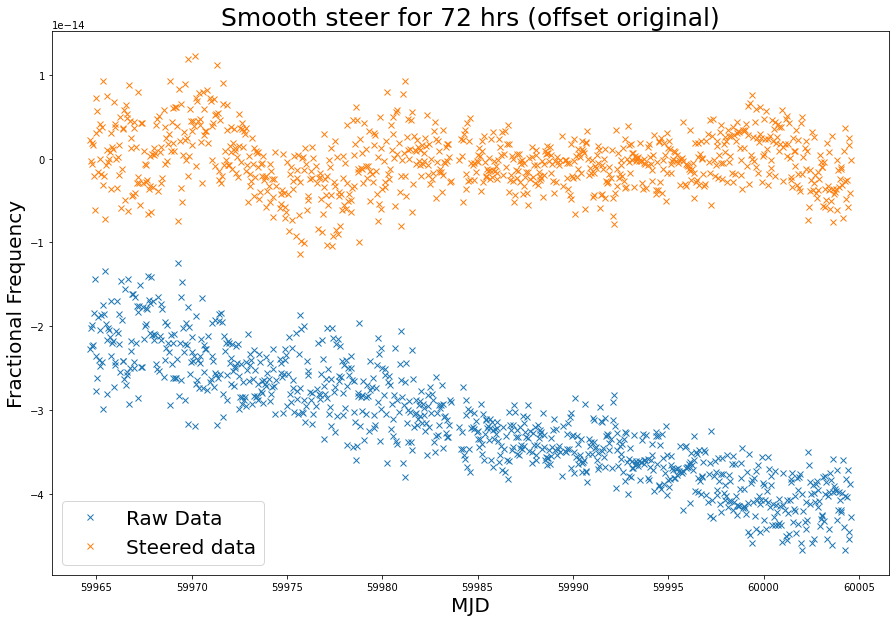

In [260]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,offset_array_csf6,'x',label='Steered data')

plt.title('Smooth steer for 72 hrs (offset original)',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

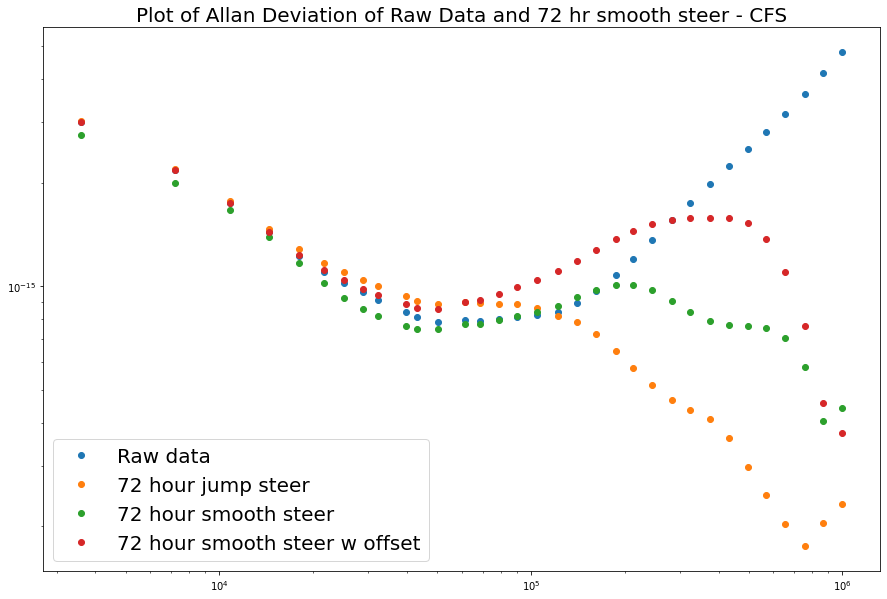

In [261]:
plt.figure(figsize=(15,10))

(t23, ad23, ade23, adn23) = at.oadev(offset_array_csf6, rate=1/3600, data_type="freq",taus=t)  # Compute the overlapping ADEV

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t5, ad5,'o',label='72 hour jump steer') # Plot the results
plt.loglog(t19, ad19,'o',label='72 hour smooth steer')        # Plot the results
plt.loglog(t23,ad23,'o',label='72 hour smooth steer w offset')


plt.title('Plot of Allan Deviation of Raw Data and 72 hr smooth steer - CFS',fontsize=20)
plt.legend(fontsize=20)

In [262]:
F0_csf_Array_shifted = F0_csf_Array + fit_line[0]

In [263]:
offset_array_csf7 = F0_csf_Array_shifted

for i in run_cfs3:
    
    m_d,b_f = np.polyfit(Time_csf_array[i:i+168],-1*offset_array_csf7[i:i+168], 1)    ## get md 
    #print(m_d,b_f)
    
    
    def f_off(slope,index) :
        return slope*(Time_csf_array[index]) + b_f                                    ## function to find f_off
    
    f_0 = f_off(m_d,(i+167))
    
    
    m = - (f_0+7*m_d)/7                                                            ## find m 
    #print(m)
    
    
    def shift(t):                                                        ## define lin function to be added to original data
        return m*t
    
    set_interest4 = Time_csf_array[i+168:]
    #print(len(set_interest))
    line3 = np.array(shift(set_interest4-set_interest4[0]))
    #print(line3)
    
    index = len(Time_csf_array) - len(set_interest4)
    #print(len(Time__array))
    #print(index)
    
    offset_array_csf7[index:] -= line3

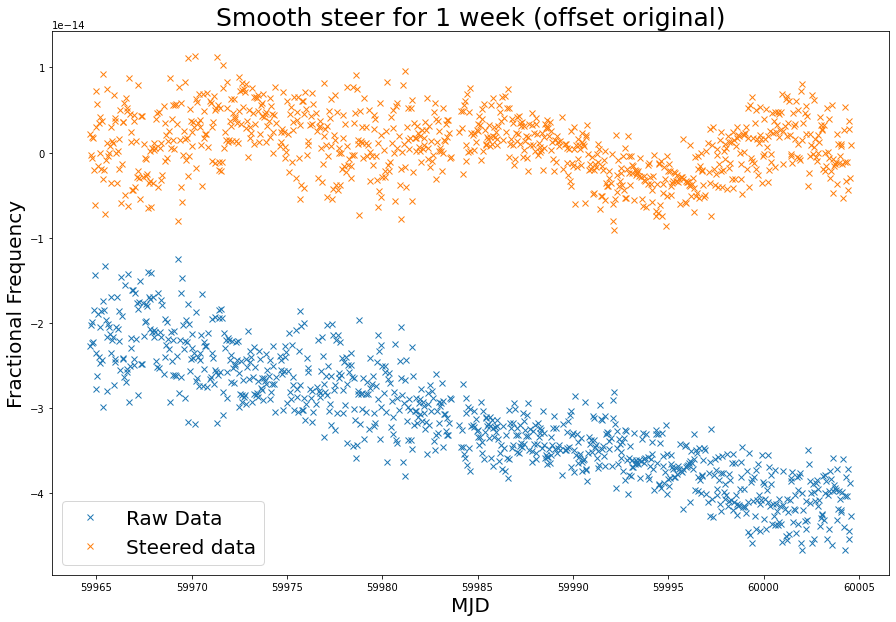

In [264]:
plt.figure(figsize=(15,10))


plt.plot(np.array(Zoom_in_CFS['TimeStamp']),-1*np.array(Zoom_in_CFS['f0']),'x',label='Raw Data')
plt.plot(Time_csf_array,offset_array_csf7,'x',label='Steered data')

plt.title('Smooth steer for 1 week (offset original)',fontsize=25)
plt.xlabel('MJD',fontsize=20)
plt.ylabel('Fractional Frequency',fontsize=20)

plt.legend(fontsize=20)

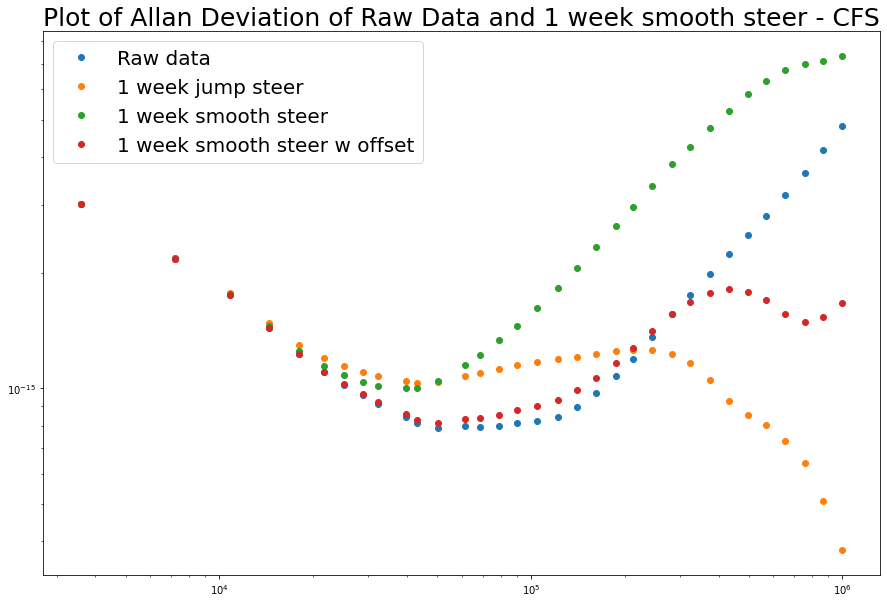

In [265]:
plt.figure(figsize=(15,10))

(t24, ad24, ade24, adn24) = at.oadev(offset_array_csf7, rate=1/3600, data_type="freq",taus=t)

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t6, ad6,'o',label='1 week jump steer') # Plot the results
plt.loglog(t20, ad20,'o',label='1 week smooth steer')        # Plot the results
plt.loglog(t24,ad24,'o',label='1 week smooth steer w offset')


plt.title('Plot of Allan Deviation of Raw Data and 1 week smooth steer - CFS',fontsize=25)
plt.legend(fontsize=20)

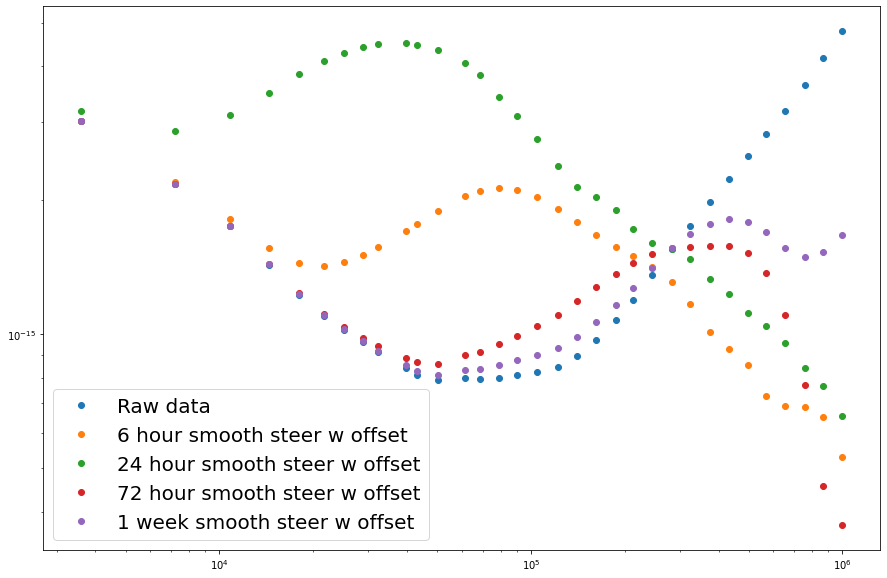

In [266]:
plt.figure(figsize=(15,10))

plt.loglog(t2, ad,'o',label='Raw data')
plt.loglog(t21, ad21,'o',label='6 hour smooth steer w offset')
plt.loglog(t22, ad22,'o',label='24 hour smooth steer w offset') 
plt.loglog(t23, ad23,'o',label='72 hour smooth steer w offset')
plt.loglog(t24, ad24,'o',label='1 week smooth steer w offset') 

plt.legend(fontsize=20)